# import packages

In [2]:
from gurobipy import *
import numpy as np
import pandas as pd
from pandas import read_excel
from pandas import ExcelFile
import matplotlib.pyplot as plt
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization
from pandas import DataFrame, ExcelWriter
from openpyxl import load_workbook

Using TensorFlow backend.


# function define

In [3]:
def getSheetNames(excelfile):
    return (ExcelFile(excelfile)).sheet_names
def readExcelRange(excelfile,sheetname="Sheet1",startrow=1,endrow=1,startcol=1,endcol=1):
    values=(read_excel(excelfile, sheetname,header=None)).values;
    return values[startrow-1:endrow,startcol-1:endcol]
def writeExcelData(df,excelfile,sheetname,startrow,startcol):
    #df=DataFrame(x)
    book = load_workbook(excelfile)
    writer = ExcelWriter(excelfile, engine='openpyxl') 
    writer.book = book
    writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
    df.to_excel(writer, sheet_name=sheetname,startrow=startrow-1, startcol=startcol-1, na_rep='No values',header=False, index=False)
    writer.save()
    writer.close()

# read data

In [4]:
excelfile=r"Competition.xlsx"

In [5]:
sheets=getSheetNames(excelfile)

In [6]:
sheets

['Forecasted Demand',
 'Annual Plant Capacity',
 'Inbound Freight Costs',
 'Handling Charges',
 'Outbound Ground Cost',
 'Transit Time (Ground)',
 'Next Day Air Cost',
 'PtoDC_ori',
 'DCtoC_ori',
 'PtoDC',
 'DCtoC',
 'PtoDC_w1',
 'DCtoC_w1',
 'PtoDC_w2',
 'DCtoC_w2',
 'PtoDC_w3',
 'DCtoC_w3',
 'PtoDC_w4',
 'DCtoC_w4',
 'w5_time']

In [7]:
demand = pd.read_excel(excelfile,sheet_name=sheets[0])
p_cap = pd.read_excel(excelfile,sheet_name=sheets[1])
#p_dc_cost = pd.read_excel(excelfile,sheet_name=sheets[2])
han_cost = pd.read_excel(excelfile,sheet_name=sheets[3])
dc_c_cost = pd.read_excel(excelfile,sheet_name=sheets[4])
time = pd.read_excel(excelfile,sheet_name=sheets[5])

In [8]:
next_day = pd.read_excel(excelfile,sheet_name=sheets[6],skiprows=1,index_col=0)

In [9]:
next_day.head()

,Atlanta,Charleston,Charlotte,Chattanooga,Chicago,Cincinnati,Dallas,Denver,Greenville,Indianapolis,Knoxville,Louisville,Memphis,Nashville,Pittsburgh
Customer,,,,,,,,,,,,,,,
10,2.58,2.38,2.58,2.58,2.58,2.58,2.82,2.82,2.58,2.58,2.58,2.58,2.75,2.58,2.38
12,1.90,1.78,1.90,1.90,1.90,1.90,2.06,2.06,1.90,1.90,1.90,1.90,2.03,1.90,1.78
14,1.95,1.81,1.95,1.95,1.95,1.95,2.13,2.13,1.95,1.95,1.95,1.95,2.06,1.95,1.81
18,1.68,1.57,1.68,1.68,1.68,1.68,1.86,1.86,1.68,1.68,1.68,1.68,1.82,1.68,1.57
19,3.81,3.81,3.81,3.81,3.81,3.81,4.26,4.26,3.81,3.81,3.81,3.81,4.08,3.81,3.57


In [10]:
p_dc_cost = pd.read_excel(excelfile,sheet_name=sheets[2],skiprows=4)

In [11]:
p_dc_cost=p_dc_cost.dropna()

In [12]:
p_dc_cost.set_index(["DC Candidates"], inplace=True)

In [13]:
han_cost.set_index(["DC"], inplace=True)

In [14]:
dc_c_cost = pd.read_excel(excelfile,sheet_name=sheets[4],skiprows=1,index_col=0)

In [15]:
time = pd.read_excel(excelfile,sheet_name=sheets[5],skiprows=1,index_col=0)

# (pass)explore cost and time

In [14]:
c_unit = dc_c_cost/time

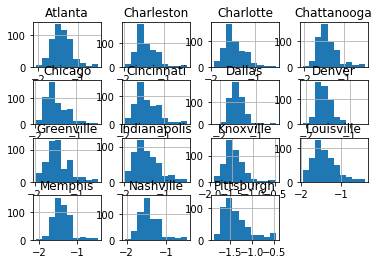

In [122]:
np.log(c_unit).hist()
plt.show()

In [123]:
dc1_cost = dc_c_cost.iloc[:,0]

In [152]:
np.floor(dc1_cost.values*2)-1

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,
       -1.,  0.,  0.,  0.,  0., -1.,  0.,  0., -1., -1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,
       -1.,  0.,  0., -1.,  0., -1.,  0.,  0.,  0.,  0., -1., -1.,  0.,
        0., -1., -1., -1., -1.,  0., -1., -1., -1.,  0., -1., -1., -1.,
       -1.,  0., -1.,  0., -1., -1.,  0.,  0., -1., -1.,  0., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        0., -1., -1., -1., -1., -1., -1., -1.,  0., -1.,  0., -1., -1.,
       -1.,  0., -1., -1., -1., -1.,  0.,  0., -1., -1.,  0., -1., -1.,
       -1., -1.,  0., -1.,  0.,  0.,  0., -1., -1., -1., -1., -1

In [126]:
dc1_time = time.iloc[:,0]

In [139]:
type(dc1_cost)

pandas.core.series.Series

In [183]:
def model(unit,data,time):
    hour = np.floor(unit * data.values)
    hour[hour<24]=1
    hour[(hour>=24)&(hour<48)]=2
    hour[(hour>=48)&(hour<72)]=3
    hour[(hour>=72)&(hour<96)]=4
    hour[hour>=96]=5
    #print(hour)
    loss = sum(abs(hour-time.values))
    return loss

In [169]:
np.floor(5 * dc1_cost.values)

array([3., 2., 2., 2., 3., 3., 3., 3., 2., 3., 2., 2., 2., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 2., 3., 2., 3., 3., 2., 3., 3., 2., 3., 2.,
       3., 3., 2., 3., 2., 2., 3., 3., 3., 3., 3., 2., 2., 2., 2., 3., 2.,
       2., 3., 2., 2., 3., 2., 3., 2., 3., 2., 3., 2., 3., 2., 2., 3., 3.,
       3., 3., 2., 3., 2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2., 3., 3.,
       2., 3., 3., 2., 2., 3., 2., 3., 2., 2., 2., 2., 3., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2.,
       2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 3., 1.,
       2., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1.,
       2., 2., 2., 3., 2., 1., 1., 1., 3., 1., 2., 1., 1., 2., 3., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [185]:
lo=[]
for a in range(1,100):
    l=model(a,dc1_cost,dc1_time)
    lo.append(l)

In [186]:
lo

[755.0,
 755.0,
 755.0,
 755.0,
 755.0,
 755.0,
 755.0,
 755.0,
 755.0,
 755.0,
 755.0,
 755.0,
 755.0,
 755.0,
 755.0,
 755.0,
 755.0,
 755.0,
 755.0,
 755.0,
 755.0,
 745.0,
 736.0,
 731.0,
 726.0,
 721.0,
 713.0,
 709.0,
 707.0,
 691.0,
 686.0,
 683.0,
 674.0,
 671.0,
 666.0,
 665.0,
 635.0,
 617.0,
 591.0,
 561.0,
 561.0,
 527.0,
 502.0,
 498.0,
 465.0,
 462.0,
 439.0,
 398.0,
 396.0,
 368.0,
 368.0,
 363.0,
 330.0,
 328.0,
 307.0,
 306.0,
 306.0,
 273.0,
 271.0,
 255.0,
 255.0,
 250.0,
 250.0,
 242.0,
 228.0,
 224.0,
 212.0,
 209.0,
 204.0,
 202.0,
 203.0,
 202.0,
 210.0,
 208.0,
 210.0,
 210.0,
 205.0,
 211.0,
 205.0,
 204.0,
 204.0,
 201.0,
 207.0,
 206.0,
 207.0,
 215.0,
 215.0,
 217.0,
 240.0,
 226.0,
 229.0,
 229.0,
 233.0,
 233.0,
 234.0,
 249.0,
 249.0,
 248.0,
 248.0]

In [41]:
x = np.array(dc_c_cost.iloc[:,0])
#y = np_utils.to_categorical(np.array(time).reshape(-1,1), n_class)

In [42]:
time_1 = time-1

In [43]:
y = np_utils.to_categorical(np.array(time_1.iloc[:,0]), n_class)

In [49]:
model = Sequential()    
model.add(Dense(8, input_dim=1,activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(5, activation='softmax')) 

'''
model.add(Dense(FL,input_dim = 11, activation = act, kernel_initializer=init)) #input nodes
    model.add(BatchNormalization())
    if complexity:      
        model.add(Dense(64,activation = act, kernel_initializer=init))
        model.add(BatchNormalization())
        model.add(Dense(128,activation = act,kernel_initializer=init))
        model.add(BatchNormalization())
        model.add(Dense(64,activation = act,kernel_initializer=init))
        model.add(BatchNormalization())
        model.add(Dense(16,activation = 'relu'))
        model.add(BatchNormalization())
    model.add(Dense(LL,activation = act,kernel_initializer=init))
    model.add(BatchNormalization())
    model.add(Dense(11, activation='softmax',kernel_regularizer=reg)) 
    model.summary()
'''

"\nmodel.add(Dense(FL,input_dim = 11, activation = act, kernel_initializer=init)) #input nodes\n    model.add(BatchNormalization())\n    if complexity:      \n        model.add(Dense(64,activation = act, kernel_initializer=init))\n        model.add(BatchNormalization())\n        model.add(Dense(128,activation = act,kernel_initializer=init))\n        model.add(BatchNormalization())\n        model.add(Dense(64,activation = act,kernel_initializer=init))\n        model.add(BatchNormalization())\n        model.add(Dense(16,activation = 'relu'))\n        model.add(BatchNormalization())\n    model.add(Dense(LL,activation = act,kernel_initializer=init))\n    model.add(BatchNormalization())\n    model.add(Dense(11, activation='softmax',kernel_regularizer=reg)) \n    model.summary()\n"

In [50]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) 
scores = model.fit(x, y, epochs = 120, batch_size =12, verbose = 2)

Epoch 1/120
 - 0s - loss: 1.5749 - acc: 0.3723
Epoch 2/120
 - 0s - loss: 1.5047 - acc: 0.5465
Epoch 3/120
 - 0s - loss: 1.4094 - acc: 0.5465
Epoch 4/120
 - 0s - loss: 1.3249 - acc: 0.5465
Epoch 5/120
 - 0s - loss: 1.2887 - acc: 0.5465
Epoch 6/120
 - 0s - loss: 1.2709 - acc: 0.5465
Epoch 7/120
 - 0s - loss: 1.2572 - acc: 0.5465
Epoch 8/120
 - 0s - loss: 1.2486 - acc: 0.5465
Epoch 9/120
 - 0s - loss: 1.2406 - acc: 0.5465
Epoch 10/120
 - 0s - loss: 1.2333 - acc: 0.5465
Epoch 11/120
 - 0s - loss: 1.2254 - acc: 0.5465
Epoch 12/120
 - 0s - loss: 1.2172 - acc: 0.5465
Epoch 13/120
 - 0s - loss: 1.2097 - acc: 0.5465
Epoch 14/120
 - 0s - loss: 1.2001 - acc: 0.5465
Epoch 15/120
 - 0s - loss: 1.1899 - acc: 0.5465
Epoch 16/120
 - 0s - loss: 1.1786 - acc: 0.5465
Epoch 17/120
 - 0s - loss: 1.1683 - acc: 0.5465
Epoch 18/120
 - 0s - loss: 1.1550 - acc: 0.5465
Epoch 19/120
 - 0s - loss: 1.1433 - acc: 0.5465
Epoch 20/120
 - 0s - loss: 1.1318 - acc: 0.5465
Epoch 21/120
 - 0s - loss: 1.1199 - acc: 0.5465
E

# gurobi opt

In [19]:
results = {}

### get data

In [16]:
plants = [p_cap.iloc[0,0],p_cap.iloc[1,0]]

In [17]:
pdc = {}
for p in plants:
    for d in list(p_dc_cost.index):
        pdc[p,d] = p_dc_cost.loc[d,p]+han_cost.loc[d,'Handling Cost']

In [18]:
dcc = {}
for d in dc_c_cost.columns.tolist():
    for c in list(dc_c_cost.index):
        dcc[d,c] = dc_c_cost.loc[c,d]

### (pass) experiment on dimension

In [54]:
aaa = np.array([[[1,2],[2,3],[3,4]],[[1,2],[2,3],[3,4]]])

In [56]:
aaa.shape

(2, 3, 2)

In [57]:
aaa

array([[[1, 2],
        [2, 3],
        [3, 4]],

       [[1, 2],
        [2, 3],
        [3, 4]]])

In [63]:
bbb = np.random.randint(1,19,12)

In [64]:
bbb.resize(2,3,2)

In [74]:
bbb

array([[[14,  6],
        [12, 12],
        [18, 10]],

       [[ 3, 11],
        [ 6,  2],
        [10, 15]]])

In [73]:
bbb[1,2,0]=10

In [77]:
bbb.tolist()[1]

[[3, 11], [6, 2], [10, 15]]

In [70]:
np.sum(aaa*bbb)

310

### define model

In [20]:
m = Model('csr')
m.ModelSense = GRB.MINIMIZE
m.setParam('TimeLimit',7200)

Academic license - for non-commercial use only
Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100


In [21]:
p_dc_volume = {}
for p,d in pdc.keys():
    p_dc_volume[p,d] = m.addVar(vtype=GRB.CONTINUOUS, name="x_{0}_{1}".format(p,d))

In [22]:
dc_c_volume = {}
for d,c in dcc.keys():
    dc_c_volume[d,c] = m.addVar(vtype=GRB.CONTINUOUS, name="x_{0}_{1}".format(d,c))

In [23]:
m.update()

In [24]:
# sum of dc is less than plants capacity
for p in plants:
    total = sum([p_dc_volume[i,j] for i,j in p_dc_volume.keys() if i==p])
    m.addConstr(total,GRB.LESS_EQUAL,p_cap.iloc[0,1],str(p)+'capacity')
# sum of customer zone is less than corresponding dc
for k in dc_c_cost.columns.tolist():
    total_c = sum([dc_c_volume[m,n] for m,n in dc_c_volume.keys() if m==k])
    m.addConstr(total_c,GRB.LESS_EQUAL,sum([p_dc_volume[a,b] for a,b in p_dc_volume.keys() if b==k]),str(k)+'volume')


In [25]:
# meet demand? question is whether we should consider the profits
for d,c in dcc.keys():
    supply_c = sum([dc_c_volume[i,j] for i,j in dc_c_volume.keys() if j==c])
    m.addConstr(supply_c,GRB.GREATER_EQUAL,demand.Demand[demand.Customer==c],str(c)+'zone demand')

In [26]:
cost_pdc = quicksum(pdc[p,d]*p_dc_volume[p,d] for p,d in pdc.keys())
cost_dcc = quicksum(dcc[d,c]*dc_c_volume[d,c] for d,c in dcc.keys())
m.setObjective(cost_pdc+cost_dcc,GRB.MINIMIZE)

In [27]:
m.update()

In [28]:
m.optimize()

Optimize a model with 7592 rows, 7605 columns and 121260 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+04, 9e+06]

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Presolve removed 7070 rows and 0 columns
Presolve time: 0.03s
Presolved: 522 rows, 7605 columns, 15210 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 7.605e+03
 Factor NZ  : 8.610e+03 (roughly 3 MBytes of memory)
 Factor Ops : 1.501e+05 (less than 1 second per iteration)
 Threads    : 1

Barrier performed 0 iterations in 0.04 seconds
Barrier solve interrupted - model solved by another algorithm


Solved with primal simplex
Solved in 1427 iterations and 0.04 seconds
Optimal objective  1.155495793e+07


In [29]:
results['all5days']=m.objVal

In [30]:
results

{'all5days': 11554957.930000003}

In [31]:
dc_c_opt = np.zeros((505,15))

In [32]:
dc_c_opt = pd.DataFrame(dc_c_opt,index=list(dc_c_cost.index),columns=dc_c_cost.columns.tolist())

In [33]:
for c in list(dc_c_opt.index):
    for d in dc_c_opt.columns.tolist():
        dc_c_opt.loc[c,d] = dc_c_volume[d,c].x

In [34]:
p_dc_opt = np.zeros((15,2))

In [35]:
p_dc_opt = pd.DataFrame(p_dc_opt,index=list(p_dc_cost.index),columns=p_dc_cost.columns.tolist())

In [36]:
for d in list(p_dc_opt.index):
    for p in p_dc_opt.columns.tolist():
        p_dc_opt.loc[d,p] = p_dc_volume[p,d].x

In [38]:
dc_c_opt

,Atlanta,Charleston,Charlotte,Chattanooga,Chicago,Cincinnati,Dallas,Denver,Greenville,Indianapolis,Knoxville,Louisville,Memphis,Nashville,Pittsburgh
10,0.0,33081.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,18595.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,12046.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,65862.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22170.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139581.0,0.0,0.0,0.0,0.0,0.0
22,0.0,25917.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,17900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,0.0,10691.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,0.0,18003.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [221]:
writeExcelData(dc_c_opt, excelfile, sheetname="PtoDC", startrow=3,startcol=2)

In [234]:
writeExcelData(p_dc_opt, excelfile, sheetname="DCtoC", startrow=3,startcol=2)

# original least cost

In [40]:
pdc_ori = {}
for p in plants:
    for d in ['Denver','Pittsburgh']:
        pdc_ori[p,d] = p_dc_cost.loc[d,p]+han_cost.loc[d,'Handling Cost']

dcc_ori = {}
for d in ['Denver','Pittsburgh']:
    for c in list(dc_c_cost.index):
        dcc_ori[d,c] = dc_c_cost.loc[c,d]

In [41]:
m_ori = Model('csr')
m_ori.ModelSense = GRB.MINIMIZE
m_ori.setParam('TimeLimit',7200)

p_dc_volume_ori = {}
for p,d in pdc_ori.keys():
    p_dc_volume_ori[p,d] = m_ori.addVar(vtype=GRB.CONTINUOUS, name="x_{0}_{1}".format(p,d))

dc_c_volume_ori = {}
for d,c in dcc_ori.keys():
    dc_c_volume_ori[d,c] = m_ori.addVar(vtype=GRB.CONTINUOUS, name="x_{0}_{1}".format(d,c))

m_ori.update()

# sum of dc is less than plants capacity
for p in plants:
    total = sum([p_dc_volume_ori[i,j] for i,j in p_dc_volume_ori.keys() if i==p])
    m_ori.addConstr(total,GRB.LESS_EQUAL,p_cap.iloc[0,1],str(p)+'capacity')
# sum of customer zone is less than corresponding dc
for k in dc_c_cost.columns.tolist():
    total_c = sum([dc_c_volume_ori[m,n] for m,n in dc_c_volume_ori.keys() if m==k])
    m_ori.addConstr(total_c,GRB.LESS_EQUAL,sum([p_dc_volume_ori[a,b] for a,b in p_dc_volume_ori.keys() if b==k]),str(k)+'volume')


# meet demand? question is whether we should consider the profits
for d,c in dcc_ori.keys():
    supply_c = sum([dc_c_volume_ori[i,j] for i,j in dc_c_volume_ori.keys() if j==c])
    m_ori.addConstr(supply_c,GRB.GREATER_EQUAL,demand.Demand[demand.Customer==c],str(c)+'zone demand')

cost_pdc_ori = quicksum(pdc_ori[p,d]*p_dc_volume_ori[p,d] for p,d in pdc_ori.keys())
cost_dcc_ori = quicksum(dcc_ori[d,c]*dc_c_volume_ori[d,c] for d,c in dcc_ori.keys())
m_ori.setObjective(cost_pdc_ori+cost_dcc_ori,GRB.MINIMIZE)

m_ori.update()

m_ori.optimize()

Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 1027 rows, 1014 columns and 3038 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+04, 9e+06]
Presolve removed 518 rows and 0 columns
Presolve time: 0.00s
Presolved: 509 rows, 1014 columns, 2028 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.705469e+07   0.000000e+00      0s
     522    1.2569546e+07   0.000000e+00   0.000000e+00      0s

Solved in 522 iterations and 0.01 seconds
Optimal objective  1.256954632e+07


In [42]:
results['2DC5days']=m_ori.objVal

In [264]:
dcc_ori.keys()

dict_keys([('Denver', 10), ('Denver', 12), ('Denver', 14), ('Denver', 18), ('Denver', 19), ('Denver', 21), ('Denver', 22), ('Denver', 24), ('Denver', 27), ('Denver', 28), ('Denver', 30), ('Denver', 31), ('Denver', 38), ('Denver', 40), ('Denver', 42), ('Denver', 49), ('Denver', 52), ('Denver', 57), ('Denver', 60), ('Denver', 61), ('Denver', 63), ('Denver', 64), ('Denver', 65), ('Denver', 67), ('Denver', 68), ('Denver', 70), ('Denver', 71), ('Denver', 76), ('Denver', 77), ('Denver', 78), ('Denver', 79), ('Denver', 80), ('Denver', 82), ('Denver', 86), ('Denver', 88), ('Denver', 100), ('Denver', 104), ('Denver', 105), ('Denver', 107), ('Denver', 109), ('Denver', 110), ('Denver', 112), ('Denver', 113), ('Denver', 115), ('Denver', 117), ('Denver', 120), ('Denver', 121), ('Denver', 122), ('Denver', 123), ('Denver', 125), ('Denver', 127), ('Denver', 128), ('Denver', 130), ('Denver', 132), ('Denver', 133), ('Denver', 135), ('Denver', 136), ('Denver', 137), ('Denver', 140), ('Denver', 142), ('De

In [43]:
dc_c_ori = np.zeros((505,2))

dc_c_ori = pd.DataFrame(dc_c_ori,index=list(dc_c_cost.index),columns=['Denver','Pittsburgh'])

for c in list(dc_c_ori.index):
    for d in dc_c_ori.columns.tolist():
        dc_c_ori.loc[c,d] = dc_c_volume_ori[d,c].x



In [44]:
p_dc_ori = np.zeros((2,2))

p_dc_ori = pd.DataFrame(p_dc_ori,index=['Denver', 'Pittsburgh'],columns=p_dc_cost.columns.tolist())

for d in list(p_dc_ori.index):
    for p in p_dc_ori.columns.tolist():
        p_dc_ori.loc[d,p] = p_dc_volume_ori[p,d].x

In [45]:
dc_c_ori

,Denver,Pittsburgh
10,0.0,33081.0
12,0.0,18595.0
14,0.0,12046.0
18,0.0,65862.0
19,0.0,22170.0
21,0.0,139581.0
22,0.0,25917.0
24,0.0,17900.0
27,0.0,10691.0
28,0.0,18003.0


In [266]:
#writeExcelData(dc_c_ori, excelfile, sheetname="DCtoC_ori", startrow=3,startcol=2)

writeExcelData(p_dc_ori, excelfile, sheetname="PtoDC_ori", startrow=3,startcol=2)

# Cost: when we decides arrive in different days.

In [335]:
def flex_cost(time,range1,range2):
    # replace time bigger than required with 1, then replace the cost with 'next_day'
    time_new = time.copy()
    for i in range(range2):
        if i <= range1:
            time_new = time_new.replace(i,0)
        else:
            time_new = time_new.replace(i,1)
        cost1 = next_day*time_new
    # replace time less than required with 1, then replace the cost with 'dc_c_cost'
    time_newer = time.copy()
    for i in range(range2):
        if i <= range1:
            time_newer = time_newer.replace(i,1)
        else:
            time_newer = time_newer.replace(i,0)
        cost2 = dc_c_cost * time_newer
    return cost1+cost2

### make arrive next day

In [236]:
dcc_cost_1day = flex_cost(time,1,6)

In [237]:
dcc_cost_1day

,Atlanta,Charleston,Charlotte,Chattanooga,Chicago,Cincinnati,Dallas,Denver,Greenville,Indianapolis,Knoxville,Louisville,Memphis,Nashville,Pittsburgh
Customer,,,,,,,,,,,,,,,
10,2.58,2.38,2.58,2.58,2.58,2.58,2.82,2.82,2.58,2.58,2.58,2.58,2.75,2.58,2.38
12,1.90,1.78,1.90,1.90,1.90,1.90,2.06,2.06,1.90,1.90,1.90,1.90,2.03,1.90,1.78
14,1.95,1.81,1.95,1.95,1.95,1.95,2.13,2.13,1.95,1.95,1.95,1.95,2.06,1.95,1.81
18,1.68,1.57,1.68,1.68,1.68,1.68,1.86,1.86,1.68,1.68,1.68,1.68,1.82,1.68,1.57
19,3.81,3.81,3.81,3.81,3.81,3.81,4.26,4.26,3.81,3.81,3.81,3.81,4.08,3.81,3.57
21,1.98,1.82,1.98,1.98,1.98,1.98,2.18,2.18,1.98,1.98,1.98,1.98,2.11,1.98,1.82
22,1.66,1.57,1.66,1.66,1.66,1.66,1.81,1.81,1.66,1.66,1.66,1.66,1.78,1.66,1.57
24,1.87,1.74,1.87,1.87,1.87,1.87,2.03,2.03,1.87,1.87,1.87,1.87,2.00,1.87,1.74
27,2.46,2.29,2.46,2.46,2.46,2.46,2.72,2.72,2.46,2.46,2.46,2.46,2.66,2.46,2.29


### make arrive within 2 days

In [238]:
dcc_cost_2day = flex_cost(time,2,6)

In [111]:
dcc_cost_2day

,Atlanta,Charleston,Charlotte,Chattanooga,Chicago,Cincinnati,Dallas,Denver,Greenville,Indianapolis,Knoxville,Louisville,Memphis,Nashville,Pittsburgh
Customer,,,,,,,,,,,,,,,
10,2.58,2.38,0.64,2.58,2.58,2.58,2.82,2.82,0.64,2.58,2.58,2.58,2.75,2.58,0.62
12,1.90,1.78,1.90,1.90,1.90,1.90,2.06,2.06,1.90,1.90,1.90,1.90,2.03,1.90,0.50
14,1.95,0.46,0.56,1.95,1.95,0.56,2.13,2.13,0.56,0.56,1.95,0.56,2.06,1.95,0.46
18,1.68,0.52,0.58,1.68,1.68,0.58,1.86,1.86,0.58,0.58,1.68,0.58,1.82,1.68,0.52
19,3.81,0.66,0.66,3.81,3.81,0.66,4.26,4.26,0.66,0.66,3.81,0.66,4.08,3.81,0.66
21,1.98,0.66,0.66,1.98,1.98,0.66,2.18,2.18,0.66,0.66,1.98,0.66,2.11,1.98,0.66
22,1.66,0.62,0.64,1.66,1.66,0.64,1.81,1.81,0.64,0.64,1.66,0.64,1.78,1.66,0.62
24,1.87,0.58,0.62,1.87,1.87,0.62,2.03,2.03,0.62,0.62,1.87,0.62,2.00,1.87,0.58
27,2.46,2.29,0.50,2.46,2.46,2.46,2.72,2.72,0.50,2.46,2.46,2.46,2.66,2.46,0.42


### make arrive within 3 days

In [239]:
dcc_cost_3day = flex_cost(time,3,6)

### make arrive within 4 days

In [240]:
dcc_cost_4day = flex_cost(time,4,6)

# get lowest cost for different maximum time required

In [241]:
def lowest_cost(cost):
    dcc_new = {}
    for d in cost.columns.tolist():
        for c in list(cost.index):
            dcc_new[d,c] = cost.loc[c,d]
#cost_pdc = quicksum(pdc[p,d]*p_dc_volume[p,d] for p,d in pdc.keys())
    cost_dcc = quicksum(dcc_new[d,c]*dc_c_volume[d,c] for d,c in dcc_new.keys())
    m.setObjective(cost_pdc+cost_dcc,GRB.MINIMIZE)

In [112]:
def write_res_toExcel(suffix,write=True):
    
    opt_dcc = np.zeros((505,15))
    opt_dcc = pd.DataFrame(opt_dcc,index=list(dc_c_cost.index),columns=dc_c_cost.columns.tolist())

    for c in list(opt_dcc.index):
        for d in opt_dcc.columns.tolist():
            opt_dcc.loc[c,d] = dc_c_volume[d,c].x


    opt_pdc = np.zeros((15,2))
    opt_pdc = pd.DataFrame(opt_pdc,index=list(p_dc_cost.index),columns=p_dc_cost.columns.tolist())

    for d in list(opt_pdc.index):
        for p in opt_pdc.columns.tolist():
            opt_pdc.loc[d,p] = p_dc_volume[p,d].x
    
    if write:
        writeExcelData(opt_dcc, excelfile, sheetname="DCtoC_"+suffix, startrow=3,startcol=2)
        writeExcelData(opt_pdc, excelfile, sheetname="PtoDC_"+suffix, startrow=3,startcol=2)
    
    return opt_dcc,opt_pdc

## within 1 days

In [242]:
lowest_cost(dcc_cost_1day)
m.update()
m.optimize()

Optimize a model with 7593 rows, 7620 columns and 121275 nonzeros
Variable types: 7605 continuous, 15 integer (15 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+00, 9e+06]

Loaded MIP start with objective 2.01767e+07

Presolve removed 7071 rows and 15 columns
Presolve time: 0.31s
Presolved: 522 rows, 7605 columns, 15210 nonzeros
Variable types: 7605 continuous, 0 integer (0 binary)

Root relaxation: cutoff, 632 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0     cutoff    0      2.0177e+07 2.0177e+07  0.00%     -    0s

Explored 0 nodes (632 simplex iterations) in 0.41 seconds
Thread count was 12 (of 12 available processors)

Solution count 1: 2.01767e+07 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.017669831000e+07, bes

In [243]:
results['all1day']=m.objVal

In [114]:
opt_dcc_w1,opt_pdc_w1 = write_res_toExcel('w1',write=False)

## within 2 days

In [244]:
lowest_cost(dcc_cost_2day)
m.update()
m.optimize()

Optimize a model with 7593 rows, 7620 columns and 121275 nonzeros
Variable types: 7605 continuous, 15 integer (15 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+00, 9e+06]

Loaded MIP start with objective 1.4479e+07

Presolve removed 7071 rows and 15 columns
Presolve time: 0.24s
Presolved: 522 rows, 7605 columns, 15210 nonzeros
Variable types: 7605 continuous, 0 integer (0 binary)

Root relaxation: cutoff, 731 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0     cutoff    0      1.4479e+07 1.4479e+07  0.00%     -    0s

Explored 0 nodes (731 simplex iterations) in 0.38 seconds
Thread count was 12 (of 12 available processors)

Solution count 1: 1.4479e+07 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.447902987000e+07, best 

In [245]:
results['all2days']=m.objVal

In [116]:
opt_dcc_w2,opt_pdc_w2 = write_res_toExcel('w2',write=False)

## within 3 days

In [246]:
lowest_cost(dcc_cost_3day)
m.update()
m.optimize()

Optimize a model with 7593 rows, 7620 columns and 121275 nonzeros
Variable types: 7605 continuous, 15 integer (15 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+00, 9e+06]

Loaded MIP start with objective 1.15791e+07

Presolve removed 7071 rows and 15 columns
Presolve time: 0.33s
Presolved: 522 rows, 7605 columns, 15210 nonzeros
Variable types: 7605 continuous, 0 integer (0 binary)

Root relaxation: cutoff, 807 iterations, 0.02 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0     cutoff    0      1.1579e+07 1.1579e+07  0.00%     -    0s

Explored 0 nodes (807 simplex iterations) in 0.48 seconds
Thread count was 12 (of 12 available processors)

Solution count 1: 1.15791e+07 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.157910402000e+07, bes

In [247]:
results['all3day']=m.objVal

In [118]:
opt_dcc_w3,opt_pdc_w3 = write_res_toExcel('w3',write=False)

## within 4 days

In [248]:
lowest_cost(dcc_cost_4day)
m.update()
m.optimize()

Optimize a model with 7593 rows, 7620 columns and 121275 nonzeros
Variable types: 7605 continuous, 15 integer (15 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+00, 9e+06]

Loaded MIP start with objective 1.1555e+07

Presolve removed 7071 rows and 15 columns
Presolve time: 0.29s
Presolved: 522 rows, 7605 columns, 15210 nonzeros
Variable types: 7605 continuous, 0 integer (0 binary)

Root relaxation: cutoff, 767 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0     cutoff    0      1.1555e+07 1.1555e+07  0.00%     -    0s

Explored 0 nodes (767 simplex iterations) in 0.44 seconds
Thread count was 12 (of 12 available processors)

Solution count 1: 1.1555e+07 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.155495793000e+07, best 

In [249]:
results['all4day']=m.objVal

In [120]:
opt_dcc_w4,opt_pdc_w4 = write_res_toExcel('w4',write=False)

# Stepwise forward exploring the cost decrease as add DCs

In [86]:
ddd={'a':1,'b':2,'c':45}

In [87]:
sum(ddd.values())

48

In [229]:
# need to change number_dc
dc_record=[]
opt_record=[]
candidates = dc_c_cost.columns.tolist()
for i in range(len(candidates)):
    for j in range(i+1,len(candidates)):
        dc_used = [candidates[i],candidates[j]]
        
        m = Model('csr')
        m.ModelSense = GRB.MINIMIZE
        m.setParam('TimeLimit',7200)

        pdc = {}
        for p in plants:
            for d in dc_used:
                pdc[p,d] = p_dc_cost.loc[d,p]+han_cost.loc[d,'Handling Cost']

        dcc = {}
        for d in dc_used:
            for c in list(dc_c_cost.index):
                dcc[d,c] = dc_c_cost.loc[c,d]




        p_dc_volume = {}
        for p,d in pdc.keys():
            p_dc_volume[p,d] = m.addVar(vtype=GRB.CONTINUOUS, name="x_{0}_{1}".format(p,d),lb=0)

        dc_c_volume = {}
        for d,c in dcc.keys():
            dc_c_volume[d,c] = m.addVar(vtype=GRB.CONTINUOUS, name="x_{0}_{1}".format(d,c),lb=0)

        m.update()

        # sum of dc is less than plants capacity
        for p in plants:
            total = sum([p_dc_volume[i,j] for i,j in p_dc_volume.keys() if i==p])
            m.addConstr(total,GRB.LESS_EQUAL,p_cap.iloc[0,1],str(p)+'capacity')
        # sum of customer zone is less than corresponding dc
        for k in dc_c_cost.columns.tolist():
            total_c = sum([dc_c_volume[m,n] for m,n in dc_c_volume.keys() if m==k])
            m.addConstr(total_c,GRB.LESS_EQUAL,sum([p_dc_volume[a,b] for a,b in p_dc_volume.keys() if b==k]),str(k)+'volume')


        # meet demand? question is whether we should consider the profits
        for d,c in dcc.keys():
            supply_c = sum([dc_c_volume[i,j] for i,j in dc_c_volume.keys() if j==c])
            m.addConstr(supply_c,GRB.GREATER_EQUAL,demand.Demand[demand.Customer==c],str(c)+'zone demand')

        cost_pdc = quicksum(pdc[p,d]*p_dc_volume[p,d] for p,d in pdc.keys())
        cost_dcc = quicksum(dcc[d,c]*dc_c_volume[d,c] for d,c in dcc.keys())
        m.setObjective(cost_pdc+cost_dcc,GRB.MINIMIZE)

        m.update()

        m.optimize()
        dc_record.append(dc_used)
        opt_record.append(m.objVal)


Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 7593 rows, 7620 columns and 121275 nonzeros
Variable types: 7605 continuous, 15 integer (15 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+00, 9e+06]
Found heuristic solution: objective 1.383557e+07
Presolve removed 7071 rows and 15 columns
Presolve time: 0.24s
Presolved: 522 rows, 7605 columns, 15210 nonzeros
Variable types: 7605 continuous, 0 integer (0 binary)

Root relaxation: objective 1.155496e+07, 785 iterations, 0.02 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    1.155496e+07 1.1555e+07  0.00%     -    0s

Explored 0 nodes (785 simplex iterations) in 0.30 seconds
Thread count was 12 (of 12 available proce

In [251]:
dc2

['Denver', 'Pittsburgh']

In [285]:
dc_used = ['Denver', 'Pittsburgh','Indianapolis']
candidates = dc_c_cost.columns.tolist()
for dc in dc_used:
    candidates.remove(dc)

In [287]:
dc_candidates

['Atlanta',
 'Charleston',
 'Charlotte',
 'Chattanooga',
 'Chicago',
 'Cincinnati',
 'Dallas',
 'Greenville',
 'Indianapolis',
 'Knoxville',
 'Louisville',
 'Memphis',
 'Nashville',
 'Pittsburgh']

# time-numoberofDC

In [346]:
dc_used =

['Denver',
 'Pittsburgh',
 'Indianapolis',
 'Dallas',
 'Greenville',
 'Charleston',
 'Chicago',
 'Memphis',
 'Atlanta',
 'Charlotte']

In [349]:
dc_c_cost.loc[:,dc_used]

,Denver,Pittsburgh
Customer,,
10,0.74,0.62
12,0.74,0.50
14,0.88,0.46
18,0.74,0.52
19,0.74,0.66
21,0.74,0.66
22,0.74,0.62
24,0.74,0.58
27,0.72,0.42


In [356]:
time

,Atlanta,Charleston,Charlotte,Chattanooga,Chicago,Cincinnati,Dallas,Denver,Greenville,Indianapolis,Knoxville,Louisville,Memphis,Nashville,Pittsburgh
Customer,,,,,,,,,,,,,,,
10,3,3,2,3,3,3,4,4,2,3,3,3,3,3,2
12,3,3,3,3,3,3,4,4,3,3,3,3,3,3,2
14,3,2,2,3,3,2,3,4,2,2,3,2,3,3,2
18,3,2,2,3,3,2,3,4,2,2,3,2,3,3,2
19,3,2,2,3,3,2,3,4,2,2,3,2,3,3,2
21,3,2,2,3,3,2,3,4,2,2,3,2,3,3,2
22,3,2,2,3,3,2,3,4,2,2,3,2,3,3,2
24,3,2,2,3,3,2,3,4,2,2,3,2,3,3,2
27,3,3,2,3,3,3,4,4,2,3,3,3,3,3,2


In [357]:
def flex_cost_stepwise(time,range1,range2,dc_used):
    # replace time bigger than required with 1, then replace the cost with 'next_day'
    time_new = time.loc[:,dc_used]
    for i in range(range2):
        if i <= range1:
            time_new = time_new.replace(i,0)
        else:
            time_new = time_new.replace(i,1)
        cost1 = next_day.loc[:,dc_used]*time_new
    # replace time less than required with 1, then replace the cost with 'dc_c_cost'
    time_newer = time.loc[:,dc_used]
    for i in range(range2):
        if i <= range1:
            time_newer = time_newer.replace(i,1)
        else:
            time_newer = time_newer.replace(i,0)
        cost2 = dc_c_cost.loc[:,dc_used] * time_newer
    return cost1+cost2

In [ ]:
def lowest_cost(cost):
    dcc_new = {}
    for d in cost.columns.tolist():
        for c in list(cost.index):
            dcc_new[d,c] = cost.loc[c,d]
#cost_pdc = quicksum(pdc[p,d]*p_dc_volume[p,d] for p,d in pdc.keys())
    cost_dcc = quicksum(dcc_new[d,c]*dc_c_volume[d,c] for d,c in dcc_new.keys())
    m.setObjective(cost_pdc+cost_dcc,GRB.MINIMIZE)

In [696]:
dc_record=[]
opt_record=[]
pdc_record=[]
ddc_record=[]
obj_prev = 100000000000000
#dc_used = ['Denver', 'Pittsburgh','Indianapolis','Dallas','Greenville','Charleston','Chicago',"Memphis","Atlanta","Charlotte"]
#,"Memphis","Chicago",'Greenville',"Dallas","Indianapolis",'Charleston','Atlanta','Charlotte','Nashville']
#dc_used =['Denver', 'Pittsburgh','Indianapolis']
#,['Denver', 'Pittsburgh','Dallas','Greenville','Indianapolis','Memphis','Charleston','Chicago','Atlanta','Charlotte']
dc_used=['Denver','Pittsburgh', 'Memphis', 'Chicago', 'Greenville']


#Denver	Pittsburgh	Dallas	Greenville	Indianapolis	Memphis	Charleston	Chicago	Atlanta	Charlotte

## DC within1day

In [359]:
#dccCost = flex_cost_stepwise(time,1,6,dc_used)

### 2DC 

In [360]:
dccCost = flex_cost_stepwise(time,1,6,dc_used)

,Denver,Pittsburgh
Customer,,
10,2.82,2.38
12,2.06,1.78
14,2.13,1.81
18,1.86,1.57
19,4.26,3.57
21,2.18,1.82
22,1.81,1.57
24,2.03,1.74
27,2.72,2.29


In [361]:
m = Model('csr')
m.ModelSense = GRB.MINIMIZE
m.setParam('TimeLimit',7200)

pdc = {}
for p in plants:
    for d in dc_used:
        pdc[p,d] = p_dc_cost.loc[d,p]+han_cost.loc[d,'Handling Cost']

dcc = {}
for d in dc_used:
    for c in list(dccCost.index):
        dcc[d,c] = dccCost.loc[c,d]




p_dc_volume = {}
for p,d in pdc.keys():
    p_dc_volume[p,d] = m.addVar(vtype=GRB.CONTINUOUS, name="x_{0}_{1}".format(p,d),lb=0)

dc_c_volume = {}
for d,c in dcc.keys():
    dc_c_volume[d,c] = m.addVar(vtype=GRB.CONTINUOUS, name="x_{0}_{1}".format(d,c),lb=0)

m.update()

# sum of dc is less than plants capacity
for p in plants:
    total = sum([p_dc_volume[i,j] for i,j in p_dc_volume.keys() if i==p])
    m.addConstr(total,GRB.LESS_EQUAL,p_cap.iloc[0,1],str(p)+'capacity')
# sum of customer zone is less than corresponding dc
for k in dc_c_cost.columns.tolist():
    total_c = sum([dc_c_volume[m,n] for m,n in dc_c_volume.keys() if m==k])
    m.addConstr(total_c,GRB.LESS_EQUAL,sum([p_dc_volume[a,b] for a,b in p_dc_volume.keys() if b==k]),str(k)+'volume')


# meet demand? question is whether we should consider the profits
for d,c in dcc.keys():
    supply_c = sum([dc_c_volume[i,j] for i,j in dc_c_volume.keys() if j==c])
    m.addConstr(supply_c,GRB.GREATER_EQUAL,demand.Demand[demand.Customer==c],str(c)+'zone demand')

cost_pdc = quicksum(pdc[p,d]*p_dc_volume[p,d] for p,d in pdc.keys())
cost_dcc = quicksum(dcc[d,c]*dc_c_volume[d,c] for d,c in dcc.keys())
m.setObjective(cost_pdc+cost_dcc,GRB.MINIMIZE)

m.update()

m.optimize()
obj_new = m.objVal
    
'''
if obj_new < obj_prev:
    obj_prev = obj_new

    opt_dcc = np.zeros((505,len(dc_used)))
    opt_dcc = pd.DataFrame(opt_dcc,index=list(dc_c_cost.index),columns=dc_used)

    for c in list(opt_dcc.index):
        for d in opt_dcc.columns.tolist():
            opt_dcc.loc[c,d] = dc_c_volume[d,c].x


    opt_pdc = np.zeros((len(dc_used),2))
    opt_pdc = pd.DataFrame(opt_pdc,index=dc_used,columns=p_dc_cost.columns.tolist())

    for d in list(opt_pdc.index):
        for p in opt_pdc.columns.tolist():
            opt_pdc.loc[d,p] = p_dc_volume[p,d].x
dc_used.remove(dc_c)
'''

Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 1027 rows, 1014 columns and 3038 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+04, 9e+06]
Presolve removed 518 rows and 0 columns
Presolve time: 0.01s
Presolved: 509 rows, 1014 columns, 2028 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.705469e+07   0.000000e+00      0s
     513    2.9687545e+07   0.000000e+00   0.000000e+00      0s

Solved in 513 iterations and 0.02 seconds
Optimal objective  2.968754541e+07


'\nif obj_new < obj_prev:\n    obj_prev = obj_new\n\n    opt_dcc = np.zeros((505,len(dc_used)))\n    opt_dcc = pd.DataFrame(opt_dcc,index=list(dc_c_cost.index),columns=dc_used)\n\n    for c in list(opt_dcc.index):\n        for d in opt_dcc.columns.tolist():\n            opt_dcc.loc[c,d] = dc_c_volume[d,c].x\n\n\n    opt_pdc = np.zeros((len(dc_used),2))\n    opt_pdc = pd.DataFrame(opt_pdc,index=dc_used,columns=p_dc_cost.columns.tolist())\n\n    for d in list(opt_pdc.index):\n        for p in opt_pdc.columns.tolist():\n            opt_pdc.loc[d,p] = p_dc_volume[p,d].x\ndc_used.remove(dc_c)\n'

In [375]:
oneDcost ={}
oneDcost['2DC']=obj_new

### Stepwise DCs

In [442]:
# need to change number_dc

candidates = dc_c_cost.columns.tolist()
for dc in dc_used:
    candidates.remove(dc)
for dc_c in candidates:
    dc_used.append(dc_c)
    #print(dc_used)
    dccCost = flex_cost_stepwise(time,1,6,dc_used)
    dc_record.append(dc_used)
    m = Model('csr')
    m.ModelSense = GRB.MINIMIZE
    m.setParam('TimeLimit',7200)

    pdc = {}
    for p in plants:
        for d in dc_used:
            pdc[p,d] = p_dc_cost.loc[d,p]+han_cost.loc[d,'Handling Cost']

    dcc = {}
    for d in dc_used:
        for c in list(dccCost.index):
            dcc[d,c] = dccCost.loc[c,d]




    p_dc_volume = {}
    for p,d in pdc.keys():
        p_dc_volume[p,d] = m.addVar(vtype=GRB.CONTINUOUS, name="x_{0}_{1}".format(p,d),lb=0)

    dc_c_volume = {}
    for d,c in dcc.keys():
        dc_c_volume[d,c] = m.addVar(vtype=GRB.CONTINUOUS, name="x_{0}_{1}".format(d,c),lb=0)

    m.update()

    # sum of dc is less than plants capacity
    for p in plants:
        total = sum([p_dc_volume[i,j] for i,j in p_dc_volume.keys() if i==p])
        m.addConstr(total,GRB.LESS_EQUAL,p_cap.iloc[0,1],str(p)+'capacity')
    # sum of customer zone is less than corresponding dc
    for k in dc_c_cost.columns.tolist():
        total_c = sum([dc_c_volume[m,n] for m,n in dc_c_volume.keys() if m==k])
        m.addConstr(total_c,GRB.LESS_EQUAL,sum([p_dc_volume[a,b] for a,b in p_dc_volume.keys() if b==k]),str(k)+'volume')


    # meet demand? question is whether we should consider the profits
    for d,c in dcc.keys():
        supply_c = sum([dc_c_volume[i,j] for i,j in dc_c_volume.keys() if j==c])
        m.addConstr(supply_c,GRB.GREATER_EQUAL,demand.Demand[demand.Customer==c],str(c)+'zone demand')

    cost_pdc = quicksum(pdc[p,d]*p_dc_volume[p,d] for p,d in pdc.keys())
    cost_dcc = quicksum(dcc[d,c]*dc_c_volume[d,c] for d,c in dcc.keys())
    m.setObjective(cost_pdc+cost_dcc,GRB.MINIMIZE)

    m.update()

    m.optimize()
    obj_new = m.objVal
    if obj_new < obj_prev:
        obj_prev = obj_new
            
        opt_dcc = np.zeros((505,len(dc_used)))
        opt_dcc = pd.DataFrame(opt_dcc,index=list(dc_c_cost.index),columns=dc_used)

        for c in list(opt_dcc.index):
            for d in opt_dcc.columns.tolist():
                opt_dcc.loc[c,d] = dc_c_volume[d,c].x

       
    dc_used.remove(dc_c)

Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 6077 rows, 6084 columns and 78828 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+04, 9e+06]

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Presolve removed 5558 rows and 0 columns
Presolve time: 0.05s
Presolved: 519 rows, 6084 columns, 12168 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 6.084e+03
 Factor NZ  : 7.047e+03 (roughly 3 MBytes of memory)
 Factor Ops : 1.031e+05 (less than 1 second per iteration)
 Threads    : 1

Barrier performed 0 iterations in 0.07 seconds
Barrier solve interrupted - model solved by another algorithm


Solved with primal simplex
Solved in 1406 iterations and 0.07 seconds
Optimal objective  2.018005273e+07
Changed value of parameter TimeLimit to 7200.0
   P

In [443]:
obj_prev

20176698.310000032

In [444]:
opt_dcc.head()

,Denver,Pittsburgh,Greenville,Dallas,Chicago,Memphis,Nashville,Atlanta,Charlotte,Indianapolis,Charleston,Knoxville
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33081.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18595.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12046.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65862.0,0.0
19,0.0,22170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [445]:
str(opt_dcc.shape[1])

'12'

In [446]:
oneDcost[str(opt_dcc.shape[1])+'DC']=obj_prev

In [447]:
oneDcost

{'2DC': 27216977.589999996,
 '3DC': 26727253.119999994,
 '4DC': 24316219.79000001,
 '5DC': 22094578.59,
 '6DC': 20999286.019999992,
 '7DC': 20546860.180000022,
 '8DC': 20396747.450000025,
 '9DC': 20272576.11000002,
 '10DC': 20197901.820000015,
 '11DC': 20180052.73000003,
 '12DC': 20176698.310000032}

In [448]:
writeExcelData(opt_dcc, excelfile, sheetname="1D"+str(opt_dcc.shape[1])+"DC", startrow=3,startcol=2)

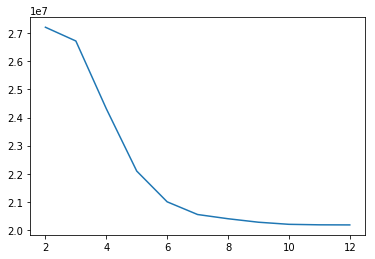

In [450]:
cost_dec = [c for c in oneDcost.values()]

plt.plot(range(2,13),cost_dec)



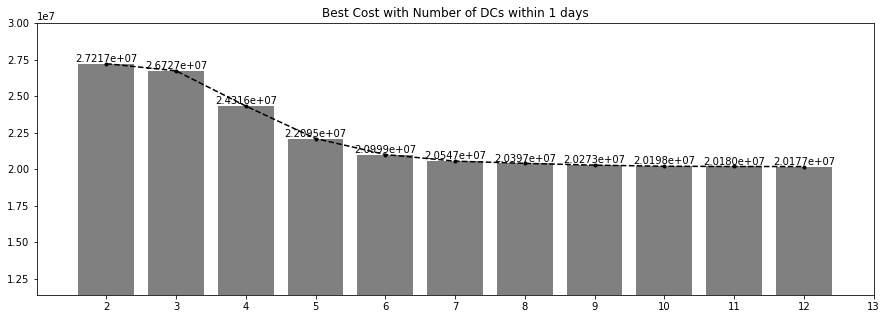

In [459]:
plt.figure(figsize=(15,5))
bars=plt.bar(range(2,13),cost_dec,color='grey')
plt.plot(range(2,13),cost_dec,color='black',linestyle='--',marker='.')
plt.ylim(11400000,30000000)
plt.xlim(1,12)
plt.xticks(np.linspace(2,13,12))  

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x()+(bar.get_width() / 2), h,'%.4e' % (h) , ha='center', va='bottom',color='black')

plt.title('Best Cost with Number of DCs within 1 days') 
plt.show()

In [460]:
oneDnames = [opt_dcc.columns.tolist()]

In [479]:
oneDnames

[['Denver',
  'Pittsburgh',
  'Greenville',
  'Dallas',
  'Chicago',
  'Memphis',
  'Nashville',
  'Atlanta',
  'Charlotte',
  'Indianapolis',
  'Charleston',
  'Knoxville']]

In [480]:
writeExcelData(oneDnames, r"timeCostDcs.xlsx", sheetname="1Dnames", startrow=3,startcol=2)

AttributeError: 'list' object has no attribute 'to_excel'

## DC within 2 DAYS

### 2DC

In [465]:
dccCost = flex_cost_stepwise(time,2,6,dc_used)

In [466]:
m = Model('csr')
m.ModelSense = GRB.MINIMIZE
m.setParam('TimeLimit',7200)

pdc = {}
for p in plants:
    for d in dc_used:
        pdc[p,d] = p_dc_cost.loc[d,p]+han_cost.loc[d,'Handling Cost']

dcc = {}
for d in dc_used:
    for c in list(dccCost.index):
        dcc[d,c] = dccCost.loc[c,d]




p_dc_volume = {}
for p,d in pdc.keys():
    p_dc_volume[p,d] = m.addVar(vtype=GRB.CONTINUOUS, name="x_{0}_{1}".format(p,d),lb=0)

dc_c_volume = {}
for d,c in dcc.keys():
    dc_c_volume[d,c] = m.addVar(vtype=GRB.CONTINUOUS, name="x_{0}_{1}".format(d,c),lb=0)

m.update()

# sum of dc is less than plants capacity
for p in plants:
    total = sum([p_dc_volume[i,j] for i,j in p_dc_volume.keys() if i==p])
    m.addConstr(total,GRB.LESS_EQUAL,p_cap.iloc[0,1],str(p)+'capacity')
# sum of customer zone is less than corresponding dc
for k in dc_c_cost.columns.tolist():
    total_c = sum([dc_c_volume[m,n] for m,n in dc_c_volume.keys() if m==k])
    m.addConstr(total_c,GRB.LESS_EQUAL,sum([p_dc_volume[a,b] for a,b in p_dc_volume.keys() if b==k]),str(k)+'volume')


# meet demand? question is whether we should consider the profits
for d,c in dcc.keys():
    supply_c = sum([dc_c_volume[i,j] for i,j in dc_c_volume.keys() if j==c])
    m.addConstr(supply_c,GRB.GREATER_EQUAL,demand.Demand[demand.Customer==c],str(c)+'zone demand')

cost_pdc = quicksum(pdc[p,d]*p_dc_volume[p,d] for p,d in pdc.keys())
cost_dcc = quicksum(dcc[d,c]*dc_c_volume[d,c] for d,c in dcc.keys())
m.setObjective(cost_pdc+cost_dcc,GRB.MINIMIZE)

m.update()

m.optimize()
obj_new = m.objVal
    
'''
if obj_new < obj_prev:
    obj_prev = obj_new

    opt_dcc = np.zeros((505,len(dc_used)))
    opt_dcc = pd.DataFrame(opt_dcc,index=list(dc_c_cost.index),columns=dc_used)

    for c in list(opt_dcc.index):
        for d in opt_dcc.columns.tolist():
            opt_dcc.loc[c,d] = dc_c_volume[d,c].x


    opt_pdc = np.zeros((len(dc_used),2))
    opt_pdc = pd.DataFrame(opt_pdc,index=dc_used,columns=p_dc_cost.columns.tolist())

    for d in list(opt_pdc.index):
        for p in opt_pdc.columns.tolist():
            opt_pdc.loc[d,p] = p_dc_volume[p,d].x
dc_used.remove(dc_c)
'''

Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 1027 rows, 1014 columns and 3038 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+04, 9e+06]
Presolve removed 518 rows and 0 columns
Presolve time: 0.01s
Presolved: 509 rows, 1014 columns, 2028 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.705469e+07   0.000000e+00      0s
     533    1.9288913e+07   0.000000e+00   0.000000e+00      0s

Solved in 533 iterations and 0.02 seconds
Optimal objective  1.928891257e+07


'\nif obj_new < obj_prev:\n    obj_prev = obj_new\n\n    opt_dcc = np.zeros((505,len(dc_used)))\n    opt_dcc = pd.DataFrame(opt_dcc,index=list(dc_c_cost.index),columns=dc_used)\n\n    for c in list(opt_dcc.index):\n        for d in opt_dcc.columns.tolist():\n            opt_dcc.loc[c,d] = dc_c_volume[d,c].x\n\n\n    opt_pdc = np.zeros((len(dc_used),2))\n    opt_pdc = pd.DataFrame(opt_pdc,index=dc_used,columns=p_dc_cost.columns.tolist())\n\n    for d in list(opt_pdc.index):\n        for p in opt_pdc.columns.tolist():\n            opt_pdc.loc[d,p] = p_dc_volume[p,d].x\ndc_used.remove(dc_c)\n'

In [467]:
twoDcost ={}
twoDcost['2DC']=obj_new

In [468]:
twoDcost

{'2DC': 19288912.570000004}

### stepwise

In [697]:
# need to change number_dc

candidates = dc_c_cost.columns.tolist()
for dc in dc_used:
    candidates.remove(dc)
for dc_c in candidates:
    dc_used.append(dc_c)
    #print(dc_used)
    dccCost = flex_cost_stepwise(time,2,6,dc_used)
    dc_record.append(dc_used)
    m = Model('csr')
    m.ModelSense = GRB.MINIMIZE
    m.setParam('TimeLimit',7200)

    pdc = {}
    for p in plants:
        for d in dc_used:
            pdc[p,d] = p_dc_cost.loc[d,p]+han_cost.loc[d,'Handling Cost']

    dcc = {}
    for d in dc_used:
        for c in list(dccCost.index):
            dcc[d,c] = dccCost.loc[c,d]




    p_dc_volume = {}
    for p,d in pdc.keys():
        p_dc_volume[p,d] = m.addVar(vtype=GRB.CONTINUOUS, name="x_{0}_{1}".format(p,d),lb=0)

    dc_c_volume = {}
    for d,c in dcc.keys():
        dc_c_volume[d,c] = m.addVar(vtype=GRB.CONTINUOUS, name="x_{0}_{1}".format(d,c),lb=0)

    m.update()

    # sum of dc is less than plants capacity
    for p in plants:
        total = sum([p_dc_volume[i,j] for i,j in p_dc_volume.keys() if i==p])
        m.addConstr(total,GRB.LESS_EQUAL,p_cap.iloc[0,1],str(p)+'capacity')
    # sum of customer zone is less than corresponding dc
    for k in dc_c_cost.columns.tolist():
        total_c = sum([dc_c_volume[m,n] for m,n in dc_c_volume.keys() if m==k])
        m.addConstr(total_c,GRB.LESS_EQUAL,sum([p_dc_volume[a,b] for a,b in p_dc_volume.keys() if b==k]),str(k)+'volume')


    # meet demand? question is whether we should consider the profits
    for d,c in dcc.keys():
        supply_c = sum([dc_c_volume[i,j] for i,j in dc_c_volume.keys() if j==c])
        m.addConstr(supply_c,GRB.GREATER_EQUAL,demand.Demand[demand.Customer==c],str(c)+'zone demand')

    cost_pdc = quicksum(pdc[p,d]*p_dc_volume[p,d] for p,d in pdc.keys())
    cost_dcc = quicksum(dcc[d,c]*dc_c_volume[d,c] for d,c in dcc.keys())
    m.setObjective(cost_pdc+cost_dcc,GRB.MINIMIZE)

    m.update()

    m.optimize()
    obj_new = m.objVal
    if obj_new < obj_prev:
        obj_prev = obj_new
            
        opt_dcc = np.zeros((505,len(dc_used)))
        opt_dcc = pd.DataFrame(opt_dcc,index=list(dc_c_cost.index),columns=dc_used)

        for c in list(opt_dcc.index):
            for d in opt_dcc.columns.tolist():
                opt_dcc.loc[c,d] = dc_c_volume[d,c].x

        opt_pdc = np.zeros((len(dc_used),2))
        opt_pdc = pd.DataFrame(opt_pdc,index=dc_used,columns=p_dc_cost.columns.tolist())

        for d in list(opt_pdc.index):
            for p in opt_pdc.columns.tolist():
                opt_pdc.loc[d,p] = p_dc_volume[p,d].x
    dc_used.remove(dc_c)

Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 3047 rows, 3042 columns and 21234 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+04, 9e+06]
Presolve removed 2534 rows and 0 columns
Presolve time: 0.02s
Presolved: 513 rows, 3042 columns, 6084 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.705469e+07   0.000000e+00      0s
     606    1.5016580e+07   0.000000e+00   0.000000e+00      0s

Solved in 606 iterations and 0.03 seconds
Optimal objective  1.501657971e+07
Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 3047 rows, 3042 columns and 21234 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 4e+00]
  Bounds range     [0e+00, 0e+

In [698]:
obj_prev

14608982.410000013

In [699]:
opt_dcc.head()

,Denver,Pittsburgh,Memphis,Chicago,Greenville,Dallas
10,0.0,33081.0,0.0,0.0,0.0,0.0
12,0.0,18595.0,0.0,0.0,0.0,0.0
14,0.0,12046.0,0.0,0.0,0.0,0.0
18,0.0,65862.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,22170.0,0.0


In [551]:
str(opt_dcc.shape[1])

'12'

In [552]:
twoDcost[str(opt_dcc.shape[1])+'DC']=obj_prev

In [553]:
twoDcost

{'2DC': 19288912.570000004,
 '3DC': 16146401.040000001,
 '4DC': 15473668.280000005,
 '5DC': 15032715.750000013,
 '6DC': 14608982.410000013,
 '7DC': 14538377.98000002,
 '8DC': 14512636.270000016,
 '9DC': 14498972.190000018,
 '10DC': 14487253.86000002,
 '11DC': 14480333.410000017,
 '12DC': 14479029.870000014}

In [700]:
writeExcelData(opt_pdc, excelfile, sheetname="PDC_2D"+str(opt_dcc.shape[1])+"DC", startrow=3,startcol=2)

In [554]:
writeExcelData(opt_dcc, excelfile, sheetname="2D"+str(opt_dcc.shape[1])+"DC", startrow=3,startcol=2)

In [681]:
cost_dec1 = [c for c in oneDcost.values()]
cost_dec2 = [c for c in twoDcost.values()]
cost_dec3 = [c for c in threeDcost.values()]
cost_dec4 = [c for c in fourDcost.values()]

ValueError: x and y must have same first dimension, but have shapes (11,) and (9,)

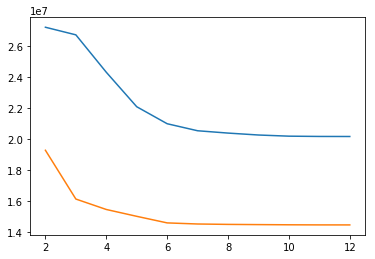

In [682]:

plt.plot(range(2,13),cost_dec1)
plt.plot(range(2,13),cost_dec2)
plt.plot(range(2,13),cost_dec3)
plt.plot(range(2,13),cost_dec4)

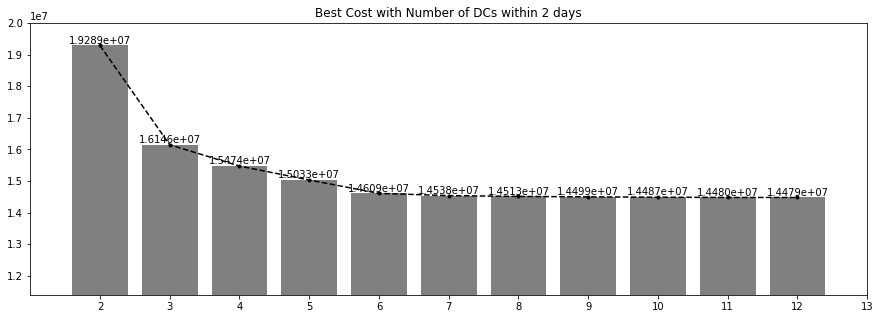

In [643]:
plt.figure(figsize=(15,5))
bars=plt.bar(range(2,13),cost_dec,color='grey')
plt.plot(range(2,13),cost_dec,color='black',linestyle='--',marker='.')
plt.ylim(11400000,20000000)
plt.xlim(1,12)
plt.xticks(np.linspace(2,13,12))  

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x()+(bar.get_width() / 2), h,'%.4e' % (h) , ha='center', va='bottom',color='black')

plt.title('Best Cost with Number of DCs within 2 days') 
plt.show()

In [558]:
twoDnames = [opt_dcc.columns.tolist()]

twoDnames

[['Denver',
  'Pittsburgh',
  'Memphis',
  'Chicago',
  'Greenville',
  'Dallas',
  'Indianapolis',
  'Charleston',
  'Atlanta',
  'Charlotte',
  'Nashville',
  'Knoxville']]

## DC within 3DAYS

### 2DC

In [560]:
dccCost = flex_cost_stepwise(time,3,6,dc_used)

In [561]:
m = Model('csr')
m.ModelSense = GRB.MINIMIZE
m.setParam('TimeLimit',7200)

pdc = {}
for p in plants:
    for d in dc_used:
        pdc[p,d] = p_dc_cost.loc[d,p]+han_cost.loc[d,'Handling Cost']

dcc = {}
for d in dc_used:
    for c in list(dccCost.index):
        dcc[d,c] = dccCost.loc[c,d]




p_dc_volume = {}
for p,d in pdc.keys():
    p_dc_volume[p,d] = m.addVar(vtype=GRB.CONTINUOUS, name="x_{0}_{1}".format(p,d),lb=0)

dc_c_volume = {}
for d,c in dcc.keys():
    dc_c_volume[d,c] = m.addVar(vtype=GRB.CONTINUOUS, name="x_{0}_{1}".format(d,c),lb=0)

m.update()

# sum of dc is less than plants capacity
for p in plants:
    total = sum([p_dc_volume[i,j] for i,j in p_dc_volume.keys() if i==p])
    m.addConstr(total,GRB.LESS_EQUAL,p_cap.iloc[0,1],str(p)+'capacity')
# sum of customer zone is less than corresponding dc
for k in dc_c_cost.columns.tolist():
    total_c = sum([dc_c_volume[m,n] for m,n in dc_c_volume.keys() if m==k])
    m.addConstr(total_c,GRB.LESS_EQUAL,sum([p_dc_volume[a,b] for a,b in p_dc_volume.keys() if b==k]),str(k)+'volume')


# meet demand? question is whether we should consider the profits
for d,c in dcc.keys():
    supply_c = sum([dc_c_volume[i,j] for i,j in dc_c_volume.keys() if j==c])
    m.addConstr(supply_c,GRB.GREATER_EQUAL,demand.Demand[demand.Customer==c],str(c)+'zone demand')

cost_pdc = quicksum(pdc[p,d]*p_dc_volume[p,d] for p,d in pdc.keys())
cost_dcc = quicksum(dcc[d,c]*dc_c_volume[d,c] for d,c in dcc.keys())
m.setObjective(cost_pdc+cost_dcc,GRB.MINIMIZE)

m.update()

m.optimize()
obj_new = m.objVal
    
'''
if obj_new < obj_prev:
    obj_prev = obj_new

    opt_dcc = np.zeros((505,len(dc_used)))
    opt_dcc = pd.DataFrame(opt_dcc,index=list(dc_c_cost.index),columns=dc_used)

    for c in list(opt_dcc.index):
        for d in opt_dcc.columns.tolist():
            opt_dcc.loc[c,d] = dc_c_volume[d,c].x


    opt_pdc = np.zeros((len(dc_used),2))
    opt_pdc = pd.DataFrame(opt_pdc,index=dc_used,columns=p_dc_cost.columns.tolist())

    for d in list(opt_pdc.index):
        for p in opt_pdc.columns.tolist():
            opt_pdc.loc[d,p] = p_dc_volume[p,d].x
dc_used.remove(dc_c)
'''

Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 1027 rows, 1014 columns and 3038 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+04, 9e+06]
Presolve removed 518 rows and 0 columns
Presolve time: 0.00s
Presolved: 509 rows, 1014 columns, 2028 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.705469e+07   0.000000e+00      0s
     522    1.2818477e+07   0.000000e+00   0.000000e+00      0s

Solved in 522 iterations and 0.01 seconds
Optimal objective  1.281847685e+07


'\nif obj_new < obj_prev:\n    obj_prev = obj_new\n\n    opt_dcc = np.zeros((505,len(dc_used)))\n    opt_dcc = pd.DataFrame(opt_dcc,index=list(dc_c_cost.index),columns=dc_used)\n\n    for c in list(opt_dcc.index):\n        for d in opt_dcc.columns.tolist():\n            opt_dcc.loc[c,d] = dc_c_volume[d,c].x\n\n\n    opt_pdc = np.zeros((len(dc_used),2))\n    opt_pdc = pd.DataFrame(opt_pdc,index=dc_used,columns=p_dc_cost.columns.tolist())\n\n    for d in list(opt_pdc.index):\n        for p in opt_pdc.columns.tolist():\n            opt_pdc.loc[d,p] = p_dc_volume[p,d].x\ndc_used.remove(dc_c)\n'

In [575]:
threeDcost ={}
threeDcost['2DC']=obj_new

In [576]:
threeDcost

{'2DC': 12818476.849999998}

### stepwise

In [689]:
# need to change number_dc

candidates = dc_c_cost.columns.tolist()
for dc in dc_used:
    candidates.remove(dc)
for dc_c in candidates:
    dc_used.append(dc_c)
    #print(dc_used)
    dccCost = flex_cost_stepwise(time,3,6,dc_used)
    dc_record.append(dc_used)
    m = Model('csr')
    m.ModelSense = GRB.MINIMIZE
    m.setParam('TimeLimit',7200)

    pdc = {}
    for p in plants:
        for d in dc_used:
            pdc[p,d] = p_dc_cost.loc[d,p]+han_cost.loc[d,'Handling Cost']

    dcc = {}
    for d in dc_used:
        for c in list(dccCost.index):
            dcc[d,c] = dccCost.loc[c,d]




    p_dc_volume = {}
    for p,d in pdc.keys():
        p_dc_volume[p,d] = m.addVar(vtype=GRB.CONTINUOUS, name="x_{0}_{1}".format(p,d),lb=0)

    dc_c_volume = {}
    for d,c in dcc.keys():
        dc_c_volume[d,c] = m.addVar(vtype=GRB.CONTINUOUS, name="x_{0}_{1}".format(d,c),lb=0)

    m.update()

    # sum of dc is less than plants capacity
    for p in plants:
        total = sum([p_dc_volume[i,j] for i,j in p_dc_volume.keys() if i==p])
        m.addConstr(total,GRB.LESS_EQUAL,p_cap.iloc[0,1],str(p)+'capacity')
    # sum of customer zone is less than corresponding dc
    for k in dc_c_cost.columns.tolist():
        total_c = sum([dc_c_volume[m,n] for m,n in dc_c_volume.keys() if m==k])
        m.addConstr(total_c,GRB.LESS_EQUAL,sum([p_dc_volume[a,b] for a,b in p_dc_volume.keys() if b==k]),str(k)+'volume')


    # meet demand? question is whether we should consider the profits
    for d,c in dcc.keys():
        supply_c = sum([dc_c_volume[i,j] for i,j in dc_c_volume.keys() if j==c])
        m.addConstr(supply_c,GRB.GREATER_EQUAL,demand.Demand[demand.Customer==c],str(c)+'zone demand')

    cost_pdc = quicksum(pdc[p,d]*p_dc_volume[p,d] for p,d in pdc.keys())
    cost_dcc = quicksum(dcc[d,c]*dc_c_volume[d,c] for d,c in dcc.keys())
    m.setObjective(cost_pdc+cost_dcc,GRB.MINIMIZE)

    m.update()

    m.optimize()
    obj_new = m.objVal
    if obj_new < obj_prev:
        obj_prev = obj_new
            
        opt_dcc = np.zeros((505,len(dc_used)))
        opt_dcc = pd.DataFrame(opt_dcc,index=list(dc_c_cost.index),columns=dc_used)

        for c in list(opt_dcc.index):
            for d in opt_dcc.columns.tolist():
                opt_dcc.loc[c,d] = dc_c_volume[d,c].x

        opt_pdc = np.zeros((len(dc_used),2))
        opt_pdc = pd.DataFrame(opt_pdc,index=dc_used,columns=p_dc_cost.columns.tolist())

        for d in list(opt_pdc.index):
            for p in opt_pdc.columns.tolist():
                opt_pdc.loc[d,p] = p_dc_volume[p,d].x
    dc_used.remove(dc_c)

Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 2542 rows, 2535 columns and 15170 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+04, 9e+06]
Presolve removed 2030 rows and 0 columns
Presolve time: 0.01s
Presolved: 512 rows, 2535 columns, 5070 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.705469e+07   0.000000e+00      0s
     638    1.1872571e+07   0.000000e+00   0.000000e+00      0s

Solved in 638 iterations and 0.03 seconds
Optimal objective  1.187257123e+07
Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 2542 rows, 2535 columns and 15170 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 4e+00]
  Bounds range     [0e+00, 0e+

In [690]:
obj_prev

11695059.830000006

In [691]:
opt_dcc.head()

,Denver,Pittsburgh,Dallas,Greenville,Indianapolis
10,0.0,33081.0,0.0,0.0,0.0
12,0.0,18595.0,0.0,0.0,0.0
14,0.0,12046.0,0.0,0.0,0.0
18,0.0,65862.0,0.0,0.0,0.0
19,0.0,0.0,0.0,22170.0,0.0


In [632]:
str(opt_dcc.shape[1])

'10'

In [633]:
threeDcost[str(opt_dcc.shape[1])+'DC']=obj_prev

In [634]:
threeDcost

{'2DC': 12818476.849999998,
 '3DC': 12182976.880000005,
 '4DC': 11890223.540000008,
 '5DC': 11695059.830000006,
 '6DC': 11661863.300000004,
 '7DC': 11635373.900000008,
 '8DC': 11612539.650000012,
 '9DC': 11599046.340000013,
 '10DC': 11587328.010000011}

In [693]:
opt_pdc

,Camden,Modesto
Denver,0.0,2832310.0
Pittsburgh,2866939.0,0.0
Dallas,0.0,3667652.0
Greenville,4306423.0,0.0
Indianapolis,1826638.0,1554727.0


In [695]:
writeExcelData(opt_pdc, excelfile, sheetname="PDC_3D"+str(opt_dcc.shape[1])+"DC", startrow=3,startcol=2)

In [635]:
writeExcelData(opt_dcc, excelfile, sheetname="3D"+str(opt_dcc.shape[1])+"DC", startrow=3,startcol=2)

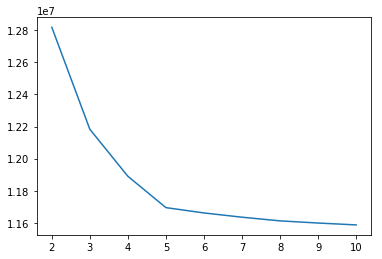

In [637]:
cost_dec = [c for c in threeDcost.values()]

plt.plot(range(2,11),cost_dec)

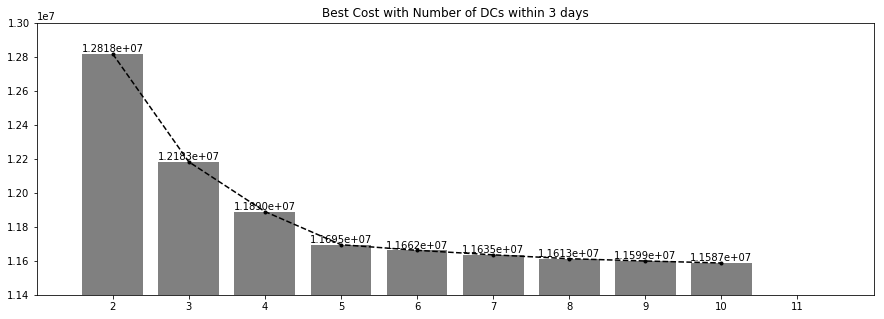

In [641]:
plt.figure(figsize=(15,5))
bars=plt.bar(range(2,11),cost_dec,color='grey')
plt.plot(range(2,11),cost_dec,color='black',linestyle='--',marker='.')
plt.ylim(11400000,13000000)
plt.xlim(1,12)
plt.xticks(np.linspace(2,11,10))  

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x()+(bar.get_width() / 2), h,'%.4e' % (h) , ha='center', va='bottom',color='black')

plt.title('Best Cost with Number of DCs within 3 days') 
plt.show()

In [680]:
threeDnames = 

NameError: name 'threeDnames' is not defined

In [558]:
twoDnames = [opt_dcc.columns.tolist()]

twoDnames

[['Denver',
  'Pittsburgh',
  'Memphis',
  'Chicago',
  'Greenville',
  'Dallas',
  'Indianapolis',
  'Charleston',
  'Atlanta',
  'Charlotte',
  'Nashville',
  'Knoxville']]

## DC within 4Days

### 2dc

In [646]:
dccCost = flex_cost_stepwise(time,4,6,dc_used)

In [647]:
m = Model('csr')
m.ModelSense = GRB.MINIMIZE
m.setParam('TimeLimit',7200)

pdc = {}
for p in plants:
    for d in dc_used:
        pdc[p,d] = p_dc_cost.loc[d,p]+han_cost.loc[d,'Handling Cost']

dcc = {}
for d in dc_used:
    for c in list(dccCost.index):
        dcc[d,c] = dccCost.loc[c,d]




p_dc_volume = {}
for p,d in pdc.keys():
    p_dc_volume[p,d] = m.addVar(vtype=GRB.CONTINUOUS, name="x_{0}_{1}".format(p,d),lb=0)

dc_c_volume = {}
for d,c in dcc.keys():
    dc_c_volume[d,c] = m.addVar(vtype=GRB.CONTINUOUS, name="x_{0}_{1}".format(d,c),lb=0)

m.update()

# sum of dc is less than plants capacity
for p in plants:
    total = sum([p_dc_volume[i,j] for i,j in p_dc_volume.keys() if i==p])
    m.addConstr(total,GRB.LESS_EQUAL,p_cap.iloc[0,1],str(p)+'capacity')
# sum of customer zone is less than corresponding dc
for k in dc_c_cost.columns.tolist():
    total_c = sum([dc_c_volume[m,n] for m,n in dc_c_volume.keys() if m==k])
    m.addConstr(total_c,GRB.LESS_EQUAL,sum([p_dc_volume[a,b] for a,b in p_dc_volume.keys() if b==k]),str(k)+'volume')


# meet demand? question is whether we should consider the profits
for d,c in dcc.keys():
    supply_c = sum([dc_c_volume[i,j] for i,j in dc_c_volume.keys() if j==c])
    m.addConstr(supply_c,GRB.GREATER_EQUAL,demand.Demand[demand.Customer==c],str(c)+'zone demand')

cost_pdc = quicksum(pdc[p,d]*p_dc_volume[p,d] for p,d in pdc.keys())
cost_dcc = quicksum(dcc[d,c]*dc_c_volume[d,c] for d,c in dcc.keys())
m.setObjective(cost_pdc+cost_dcc,GRB.MINIMIZE)

m.update()

m.optimize()
obj_new = m.objVal
    
'''
if obj_new < obj_prev:
    obj_prev = obj_new

    opt_dcc = np.zeros((505,len(dc_used)))
    opt_dcc = pd.DataFrame(opt_dcc,index=list(dc_c_cost.index),columns=dc_used)

    for c in list(opt_dcc.index):
        for d in opt_dcc.columns.tolist():
            opt_dcc.loc[c,d] = dc_c_volume[d,c].x


    opt_pdc = np.zeros((len(dc_used),2))
    opt_pdc = pd.DataFrame(opt_pdc,index=dc_used,columns=p_dc_cost.columns.tolist())

    for d in list(opt_pdc.index):
        for p in opt_pdc.columns.tolist():
            opt_pdc.loc[d,p] = p_dc_volume[p,d].x
dc_used.remove(dc_c)
'''

Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 1027 rows, 1014 columns and 3038 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+04, 9e+06]
Presolve removed 518 rows and 0 columns
Presolve time: 0.00s
Presolved: 509 rows, 1014 columns, 2028 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.705469e+07   0.000000e+00      0s
     522    1.2569546e+07   0.000000e+00   0.000000e+00      0s

Solved in 522 iterations and 0.01 seconds
Optimal objective  1.256954632e+07


'\nif obj_new < obj_prev:\n    obj_prev = obj_new\n\n    opt_dcc = np.zeros((505,len(dc_used)))\n    opt_dcc = pd.DataFrame(opt_dcc,index=list(dc_c_cost.index),columns=dc_used)\n\n    for c in list(opt_dcc.index):\n        for d in opt_dcc.columns.tolist():\n            opt_dcc.loc[c,d] = dc_c_volume[d,c].x\n\n\n    opt_pdc = np.zeros((len(dc_used),2))\n    opt_pdc = pd.DataFrame(opt_pdc,index=dc_used,columns=p_dc_cost.columns.tolist())\n\n    for d in list(opt_pdc.index):\n        for p in opt_pdc.columns.tolist():\n            opt_pdc.loc[d,p] = p_dc_volume[p,d].x\ndc_used.remove(dc_c)\n'

In [648]:
fourDcost ={}
fourDcost['2DC']=obj_new

In [649]:
fourDcost

{'2DC': 12569546.32}

### stepwise

In [659]:
# need to change number_dc

candidates = dc_c_cost.columns.tolist()
for dc in dc_used:
    candidates.remove(dc)
for dc_c in candidates:
    dc_used.append(dc_c)
    #print(dc_used)
    dccCost = flex_cost_stepwise(time,4,6,dc_used)
    dc_record.append(dc_used)
    m = Model('csr')
    m.ModelSense = GRB.MINIMIZE
    m.setParam('TimeLimit',7200)

    pdc = {}
    for p in plants:
        for d in dc_used:
            pdc[p,d] = p_dc_cost.loc[d,p]+han_cost.loc[d,'Handling Cost']

    dcc = {}
    for d in dc_used:
        for c in list(dccCost.index):
            dcc[d,c] = dccCost.loc[c,d]




    p_dc_volume = {}
    for p,d in pdc.keys():
        p_dc_volume[p,d] = m.addVar(vtype=GRB.CONTINUOUS, name="x_{0}_{1}".format(p,d),lb=0)

    dc_c_volume = {}
    for d,c in dcc.keys():
        dc_c_volume[d,c] = m.addVar(vtype=GRB.CONTINUOUS, name="x_{0}_{1}".format(d,c),lb=0)

    m.update()

    # sum of dc is less than plants capacity
    for p in plants:
        total = sum([p_dc_volume[i,j] for i,j in p_dc_volume.keys() if i==p])
        m.addConstr(total,GRB.LESS_EQUAL,p_cap.iloc[0,1],str(p)+'capacity')
    # sum of customer zone is less than corresponding dc
    for k in dc_c_cost.columns.tolist():
        total_c = sum([dc_c_volume[m,n] for m,n in dc_c_volume.keys() if m==k])
        m.addConstr(total_c,GRB.LESS_EQUAL,sum([p_dc_volume[a,b] for a,b in p_dc_volume.keys() if b==k]),str(k)+'volume')


    # meet demand? question is whether we should consider the profits
    for d,c in dcc.keys():
        supply_c = sum([dc_c_volume[i,j] for i,j in dc_c_volume.keys() if j==c])
        m.addConstr(supply_c,GRB.GREATER_EQUAL,demand.Demand[demand.Customer==c],str(c)+'zone demand')

    cost_pdc = quicksum(pdc[p,d]*p_dc_volume[p,d] for p,d in pdc.keys())
    cost_dcc = quicksum(dcc[d,c]*dc_c_volume[d,c] for d,c in dcc.keys())
    m.setObjective(cost_pdc+cost_dcc,GRB.MINIMIZE)

    m.update()

    m.optimize()
    obj_new = m.objVal
    if obj_new < obj_prev:
        obj_prev = obj_new
            
        opt_dcc = np.zeros((505,len(dc_used)))
        opt_dcc = pd.DataFrame(opt_dcc,index=list(dc_c_cost.index),columns=dc_used)

        for c in list(opt_dcc.index):
            for d in opt_dcc.columns.tolist():
                opt_dcc.loc[c,d] = dc_c_volume[d,c].x

       
    dc_used.remove(dc_c)

Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 2037 rows, 2028 columns and 10116 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+04, 9e+06]
Presolve removed 1526 rows and 0 columns
Presolve time: 0.01s
Presolved: 511 rows, 2028 columns, 4056 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.705469e+07   0.000000e+00      0s
     552    1.2009496e+07   0.000000e+00   0.000000e+00      0s

Solved in 552 iterations and 0.01 seconds
Optimal objective  1.200949584e+07
Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 2037 rows, 2028 columns and 10116 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 2e+00]
  Bounds range     [0e+00, 0e+

Presolved: 511 rows, 2028 columns, 4056 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.705469e+07   0.000000e+00      0s
     558    1.2055601e+07   0.000000e+00   0.000000e+00      0s

Solved in 558 iterations and 0.01 seconds
Optimal objective  1.205560074e+07


In [660]:
obj_prev

11860026.25000001

In [661]:
opt_dcc.head()

,Denver,Pittsburgh,Indianapolis,Dallas
10,0.0,33081.0,0.0,0.0
12,0.0,18595.0,0.0,0.0
14,0.0,12046.0,0.0,0.0
18,0.0,65862.0,0.0,0.0
19,0.0,0.0,22170.0,0.0


In [662]:
str(opt_dcc.shape[1])

'4'

In [663]:
fourDcost[str(opt_dcc.shape[1])+'DC']=obj_prev

In [664]:
fourDcost

{'2DC': 12569546.32, '3DC': 12142364.200000003, '4DC': 11860026.25000001}

In [665]:
writeExcelData(opt_dcc, excelfile, sheetname="4D"+str(opt_dcc.shape[1])+"DC", startrow=3,startcol=2)

In [332]:
#new_volume = {}
new_volume['Charlotte'] = sum(opt_dcc.Charlotte)

In [333]:
writeExcelData(opt_dcc, excelfile, sheetname="opt_10DC", startrow=3,startcol=2)

In [321]:
new_volume

{'Indianapolis': 8867831.0,
 'Dallas': 4565573.0,
 'Greenville': 3207806.0,
 'Charleston': 1635612.0,
 'Chicago': 513058.0,
 'Memphis': 390229.0}

In [280]:
sum(demand.Demand)

17054689

In [277]:
sum(opt_dcc.Pittsburgh)

3546020.0

In [275]:
new_volume

{'Indianapolis': 8867831.0}

In [264]:
opt_record.index(min(opt_record))

8

In [265]:
dc_record

[['Denver', 'Pittsburgh'],
 ['Denver', 'Pittsburgh'],
 ['Denver', 'Pittsburgh'],
 ['Denver', 'Pittsburgh'],
 ['Denver', 'Pittsburgh'],
 ['Denver', 'Pittsburgh'],
 ['Denver', 'Pittsburgh'],
 ['Denver', 'Pittsburgh'],
 ['Denver', 'Pittsburgh'],
 ['Denver', 'Pittsburgh'],
 ['Denver', 'Pittsburgh'],
 ['Denver', 'Pittsburgh'],
 ['Denver', 'Pittsburgh'],
 ['Denver', 'Pittsburgh']]

In [230]:
binaries = [v.x for v in p_dc_binary]

In [231]:
binaries

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [227]:
dc_used

['Atlanta',
 'Charleston',
 'Charlotte',
 'Chattanooga',
 'Chicago',
 'Cincinnati',
 'Dallas',
 'Denver',
 'Greenville',
 'Indianapolis',
 'Knoxville',
 'Louisville',
 'Memphis',
 'Nashville',
 'Pittsburgh']

In [67]:
def addDCs(ori,dc_candidates):
    res = {}
    volume_dc_c={}
    volume_p_dc={}
    for dc_c in dc_candidates:
        ori.append(dc_c)
        #print(ori)
        pdc_ori = {}
        for p in plants:
            for d in ori:
                pdc_ori[p,d] = p_dc_cost.loc[d,p]+han_cost.loc[d,'Handling Cost']

        dcc_ori = {}
        for d in ori:
            for c in list(dc_c_cost.index):
                dcc_ori[d,c] = dc_c_cost.loc[c,d]


        m_ori = Model('csr')
        m_ori.ModelSense = GRB.MINIMIZE
        m_ori.setParam('TimeLimit',7200)

        p_dc_volume_ori = {}
        for p,d in pdc_ori.keys():
            p_dc_volume_ori[p,d] = m_ori.addVar(vtype=GRB.CONTINUOUS, name="x_{0}_{1}".format(p,d))

        dc_c_volume_ori = {}
        for d,c in dcc_ori.keys():
            dc_c_volume_ori[d,c] = m_ori.addVar(vtype=GRB.CONTINUOUS, name="x_{0}_{1}".format(d,c))

        m_ori.update()

        # sum of dc is less than plants capacity
        for p in plants:
            total = sum([p_dc_volume_ori[i,j] for i,j in p_dc_volume_ori.keys() if i==p])
            m_ori.addConstr(total,GRB.LESS_EQUAL,p_cap.iloc[0,1],str(p)+'capacity')
        # sum of customer zone is less than corresponding dc
        for k in ori:
            total_c = sum([dc_c_volume_ori[m,n] for m,n in dc_c_volume_ori.keys() if m==k])
            m_ori.addConstr(total_c,GRB.LESS_EQUAL,sum([p_dc_volume_ori[a,b] for a,b in p_dc_volume_ori.keys() if b==k]),str(k)+'volume')


        # meet demand? question is whether we should consider the profits
        for d,c in dcc_ori.keys():
            supply_c = sum([dc_c_volume_ori[i,j] for i,j in dc_c_volume_ori.keys() if j==c])
            m_ori.addConstr(supply_c,GRB.GREATER_EQUAL,demand.Demand[demand.Customer==c],str(c)+'zone demand')

        cost_pdc_ori = quicksum(pdc_ori[p,d]*p_dc_volume_ori[p,d] for p,d in pdc_ori.keys())
        cost_dcc_ori = quicksum(dcc_ori[d,c]*dc_c_volume_ori[d,c] for d,c in dcc_ori.keys())
        m_ori.setObjective(cost_pdc_ori+cost_dcc_ori,GRB.MINIMIZE)

        m_ori.update()

        m_ori.optimize()
        res[dc_c]=m_ori.objVal
        volume_dc_c[dc_c]=dc_c_volume_ori
        volume_p_dc[dc_c]=p_dc_volume_ori
        #print(ori)
        ori.remove(dc_c)
    return res,volume_dc_c,volume_p_dc

In [ ]:
res = []
volume_dc_c={}
volume_p_dc={}
for dc_c in dc_candidates:
ori.append(dc_c)
#print(ori)
pdc_ori = {}
for p in plants:
    for d in ori:
        pdc_ori[p,d] = p_dc_cost.loc[d,p]+han_cost.loc[d,'Handling Cost']

dcc_ori = {}
for d in ori:
    for c in list(dc_c_cost.index):
        dcc_ori[d,c] = dc_c_cost.loc[c,d]


m_ori = Model('csr')
m_ori.ModelSense = GRB.MINIMIZE
m_ori.setParam('TimeLimit',7200)

p_dc_volume_ori = {}
for p,d in pdc_ori.keys():
    p_dc_volume_ori[p,d] = m_ori.addVar(vtype=GRB.CONTINUOUS, name="x_{0}_{1}".format(p,d))

dc_c_volume_ori = {}
for d,c in dcc_ori.keys():
    dc_c_volume_ori[d,c] = m_ori.addVar(vtype=GRB.CONTINUOUS, name="x_{0}_{1}".format(d,c))

m_ori.update()

# sum of dc is less than plants capacity
for p in plants:
    total = sum([p_dc_volume_ori[i,j] for i,j in p_dc_volume_ori.keys() if i==p])
    m_ori.addConstr(total,GRB.LESS_EQUAL,p_cap.iloc[0,1],str(p)+'capacity')
# sum of customer zone is less than corresponding dc
for k in ori:
    total_c = sum([dc_c_volume_ori[m,n] for m,n in dc_c_volume_ori.keys() if m==k])
    m_ori.addConstr(total_c,GRB.LESS_EQUAL,sum([p_dc_volume_ori[a,b] for a,b in p_dc_volume_ori.keys() if b==k]),str(k)+'volume')


# meet demand? question is whether we should consider the profits
for d,c in dcc_ori.keys():
    supply_c = sum([dc_c_volume_ori[i,j] for i,j in dc_c_volume_ori.keys() if j==c])
    m_ori.addConstr(supply_c,GRB.GREATER_EQUAL,demand.Demand[demand.Customer==c],str(c)+'zone demand')

cost_pdc_ori = quicksum(pdc_ori[p,d]*p_dc_volume_ori[p,d] for p,d in pdc_ori.keys())
cost_dcc_ori = quicksum(dcc_ori[d,c]*dc_c_volume_ori[d,c] for d,c in dcc_ori.keys())
m_ori.setObjective(cost_pdc_ori+cost_dcc_ori,GRB.MINIMIZE)

m_ori.update()

m_ori.optimize()
res[dc_c]=m_ori.objVal
volume_dc_c[dc_c]=dc_c_volume_ori
volume_p_dc[dc_c]=p_dc_volume_ori
#print(ori)
ori.remove(dc_c)

In [79]:
min(res_3dc.values())

12142364.200000003

In [80]:
def stat(number,resDC,results,costWithDc,dc_n,dc_candidates,dc_c,p_dc):
    results[str(number)+'DC5days']=min(resDC.values())
    new_resDC = {v:k for k,v in resDC.items()}
    new =new_resDC[min(resDC.values())]
    dc_new =dc_n+[new]
    dc_c_volume = dc_c[new]
    p_dc_volume = p_dc[new]
    costWithDc[min(resDC.values())]=dc_new
    dc_candidates.remove(new_resDC[min(resDC.values())])
    return results,costWithDc,dc_new,dc_candidates,dc_c_volume,p_dc_volume

In [83]:
def distribute(n_dc,dc_n,dc_c_v,p_dc_v):
    dc_c = np.zeros((505,n_dc))
    dc_c = pd.DataFrame(dc_c,index=list(dc_c_cost.index),columns=dc_n)
    for c in list(dc_c.index):
        for d in dc_c.columns.tolist():
            dc_c.loc[c,d] = dc_c_v[d,c].x
    
    p_dc = np.zeros((n_dc,2))
    p_dc = pd.DataFrame(p_dc,index=dc_n,columns=p_dc_cost.columns.tolist())
    for d in list(p_dc.index):
        for p in p_dc.columns.tolist():
            p_dc.loc[d,p] = p_dc_v[p,d].x
    return dc_c,p_dc

## 3DC

In [232]:
dc_names = dc_c_cost.columns.tolist()

In [233]:
dc_candidates = dc_names.copy()

In [234]:
dc_candidates.remove('Denver')

In [71]:
dc_candidates.remove('Pittsburgh')

In [72]:
dc_candidates

['Atlanta',
 'Charleston',
 'Charlotte',
 'Chattanooga',
 'Chicago',
 'Cincinnati',
 'Dallas',
 'Greenville',
 'Indianapolis',
 'Knoxville',
 'Louisville',
 'Memphis',
 'Nashville']

In [73]:
dc2 = ['Denver','Pittsburgh']

In [74]:
dc2,dc_candidates

(['Denver', 'Pittsburgh'],
 ['Atlanta',
  'Charleston',
  'Charlotte',
  'Chattanooga',
  'Chicago',
  'Cincinnati',
  'Dallas',
  'Greenville',
  'Indianapolis',
  'Knoxville',
  'Louisville',
  'Memphis',
  'Nashville'])

In [75]:
res_3dc,dc_c_3,p_dc_3 = addDCs(dc2,dc_candidates)

Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 1520 rows, 1521 columns and 6072 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+04, 9e+06]
Presolve removed 1010 rows and 0 columns
Presolve time: 0.00s
Presolved: 510 rows, 1521 columns, 3042 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.705469e+07   0.000000e+00      0s
     525    1.2333957e+07   0.000000e+00   0.000000e+00      0s

Solved in 525 iterations and 0.01 seconds
Optimal objective  1.233395708e+07
Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 1520 rows, 1521 columns and 6072 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 1e+00]
  Bounds range     [0e+00, 0e+00


Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.705469e+07   0.000000e+00      0s
     574    1.2312872e+07   0.000000e+00   0.000000e+00      0s

Solved in 574 iterations and 0.01 seconds
Optimal objective  1.231287218e+07
Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 1520 rows, 1521 columns and 6072 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+04, 9e+06]
Presolve removed 1010 rows and 0 columns
Presolve time: 0.01s
Presolved: 510 rows, 1521 columns, 3042 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.705469e+07   0.000000e+00      0s
     522    1.2309585e+07   0.000000e+00   0.000000e+00      0s

Solved in 522 iterations and 0.01 seconds
Optimal objective  1.230958451e+07


In [81]:
costWithDc = {}

In [82]:
results,costWithDc,dc3,dc_candidates,dc_c_volume3,p_dc_volume3=stat(3,res_3dc,results,costWithDc,dc2,dc_candidates,dc_c_3,p_dc_3)

In [62]:
results

{'all5days': 11554957.930000003,
 '2DC5days': 12569546.32,
 '3DC5days': 12142364.200000003}

In [63]:
costWithDc

{12142364.200000003: ['Denver', 'Pittsburgh', 'Indianapolis']}

In [85]:
dc_c_volume3

{('Denver', 10): <gurobi.Var *Awaiting Model Update*>,
 ('Denver', 12): <gurobi.Var *Awaiting Model Update*>,
 ('Denver', 14): <gurobi.Var *Awaiting Model Update*>,
 ('Denver', 18): <gurobi.Var *Awaiting Model Update*>,
 ('Denver', 19): <gurobi.Var *Awaiting Model Update*>,
 ('Denver', 21): <gurobi.Var *Awaiting Model Update*>,
 ('Denver', 22): <gurobi.Var *Awaiting Model Update*>,
 ('Denver', 24): <gurobi.Var *Awaiting Model Update*>,
 ('Denver', 27): <gurobi.Var *Awaiting Model Update*>,
 ('Denver', 28): <gurobi.Var *Awaiting Model Update*>,
 ('Denver', 30): <gurobi.Var *Awaiting Model Update*>,
 ('Denver', 31): <gurobi.Var *Awaiting Model Update*>,
 ('Denver', 38): <gurobi.Var *Awaiting Model Update*>,
 ('Denver', 40): <gurobi.Var *Awaiting Model Update*>,
 ('Denver', 42): <gurobi.Var *Awaiting Model Update*>,
 ('Denver', 49): <gurobi.Var *Awaiting Model Update*>,
 ('Denver', 52): <gurobi.Var *Awaiting Model Update*>,
 ('Denver', 57): <gurobi.Var *Awaiting Model Update*>,
 ('Denver'

In [84]:
dcc_3,pdc_3 = distribute(3,dc3,dc_c_volume3,p_dc_volume3)

GurobiError: Variable has not yet been added to the model

In [337]:
results['3DC5days']=min(res.values())

In [338]:
results

{'all5days': 11554957.930000003,
 '2DC5days': 12569546.32,
 'all1day': 20176698.309999995,
 'all2days': 14479029.870000007,
 'all3day': 11579104.020000003,
 'all4day': 11554957.930000003,
 '3DC5days': 12142364.200000003}

In [360]:
dc3 = ori +['Indianapolis']

In [361]:
dc3

['Denver', 'Pittsburgh', 'Indianapolis']

In [362]:
costWithDc = {}
costWithDc[results['2DC5days']]=ori
costWithDc[min(res.values())]=dc3

In [363]:
costWithDc

{12569546.32: ['Denver', 'Pittsburgh'],
 12142364.200000003: ['Denver', 'Pittsburgh', 'Indianapolis']}

In [346]:
dc_candidates.remove('Indianapolis')

## 4DC

In [350]:
res_4dc = addDCs(dc3,dc_candidates)

Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 2026 rows, 2028 columns and 10116 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+04, 9e+06]
Presolve removed 1515 rows and 0 columns
Presolve time: 0.08s
Presolved: 511 rows, 2028 columns, 4056 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.705469e+07   0.000000e+00      0s
     552    1.2009496e+07   0.000000e+00   0.000000e+00      0s

Solved in 552 iterations and 0.08 seconds
Optimal objective  1.200949584e+07
Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 2026 rows, 2028 columns and 10116 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 1e+00]
  Bounds range     [0e+00, 0e+

Presolved: 511 rows, 2028 columns, 4056 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.705469e+07   0.000000e+00      0s
     558    1.2055601e+07   0.000000e+00   0.000000e+00      0s

Solved in 558 iterations and 0.01 seconds
Optimal objective  1.205560074e+07


In [351]:
res_4dc

{'Atlanta': 12009495.840000015,
 'Charleston': 12061897.250000007,
 'Charlotte': 12019385.880000014,
 'Chattanooga': 12066727.580000011,
 'Chicago': 12119391.820000008,
 'Cincinnati': 12139030.99,
 'Dallas': 11860026.25000001,
 'Greenville': 11915025.480000013,
 'Knoxville': 12005359.780000007,
 'Louisville': 12115273.240000008,
 'Memphis': 12032178.70000001,
 'Nashville': 12055600.740000008}

In [373]:
results,costWithDc,dc4,dc_candidates=stat(4,res_4dc,results,costWithDc,dc3,dc_candidates)

In [374]:
costWithDc

{12569546.32: ['Denver', 'Pittsburgh'],
 12142364.200000003: ['Denver', 'Pittsburgh', 'Indianapolis'],
 11860026.25000001: ['Denver', 'Pittsburgh', 'Indianapolis', 'Dallas']}

In [376]:
dc_candidates

['Atlanta',
 'Charleston',
 'Charlotte',
 'Chattanooga',
 'Chicago',
 'Cincinnati',
 'Greenville',
 'Knoxville',
 'Louisville',
 'Memphis',
 'Nashville']

## 5 DC

In [377]:
res_5dc = addDCs(dc4,dc_candidates)

Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 2532 rows, 2535 columns and 15170 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+04, 9e+06]
Presolve removed 2020 rows and 0 columns
Presolve time: 0.02s
Presolved: 512 rows, 2535 columns, 5070 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.705469e+07   0.000000e+00      0s
     593    1.1755098e+07   0.000000e+00   0.000000e+00      0s

Solved in 593 iterations and 0.03 seconds
Optimal objective  1.175509750e+07
Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 2532 rows, 2535 columns and 15170 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 1e+00]
  Bounds range     [0e+00, 0e+

In [378]:
results,costWithDc,dc5,dc_candidates=stat(5,res_5dc,results,costWithDc,dc4,dc_candidates)

## 6DC

In [385]:
res_6dc = addDCs(dc5,dc_candidates)

Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 3038 rows, 3042 columns and 21234 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+04, 9e+06]
Presolve removed 2525 rows and 0 columns
Presolve time: 0.01s
Presolved: 513 rows, 3042 columns, 6084 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.705469e+07   0.000000e+00      0s
     652    1.1643620e+07   0.000000e+00   0.000000e+00      0s

Solved in 652 iterations and 0.03 seconds
Optimal objective  1.164362007e+07
Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 3038 rows, 3042 columns and 21234 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 1e+00]
  Bounds range     [0e+00, 0e+

In [386]:
results,costWithDc,dc6,dc_candidates=stat(6,res_6dc,results,costWithDc,dc5,dc_candidates)

## 7DC

In [391]:
res_7dc = addDCs(dc6,dc_candidates)

Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 3544 rows, 3549 columns and 28308 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+04, 9e+06]
Presolve removed 3030 rows and 0 columns
Presolve time: 0.02s
Presolved: 514 rows, 3549 columns, 7098 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.705469e+07   0.000000e+00      0s
     673    1.1617131e+07   0.000000e+00   0.000000e+00      0s

Solved in 673 iterations and 0.04 seconds
Optimal objective  1.161713067e+07
Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 3544 rows, 3549 columns and 28308 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 1e+00]
  Bounds range     [0e+00, 0e+

In [392]:
results,costWithDc,dc7,dc_candidates=stat(7,res_7dc,results,costWithDc,dc6,dc_candidates)

In [431]:
results

{'all5days': 11554957.930000003,
 '2DC5days': 12569546.32,
 'all1day': 20176698.309999995,
 'all2days': 14479029.870000007,
 'all3day': 11579104.020000003,
 'all4day': 11554957.930000003,
 '3DC5days': 12142364.200000003,
 '4DC5days': 11860026.25000001,
 '5DC5days': 11657265.78000001,
 '6DC5days': 11630776.38000001,
 '7DC5days': 11607942.130000014}

In [394]:
costWithDc

{12569546.32: ['Denver', 'Pittsburgh'],
 12142364.200000003: ['Denver', 'Pittsburgh', 'Indianapolis'],
 11860026.25000001: ['Denver', 'Pittsburgh', 'Indianapolis', 'Dallas'],
 11657265.78000001: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville'],
 11630776.38000001: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston'],
 11607942.130000014: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston',
  'Chicago']}

In [440]:
dc7

['Denver',
 'Pittsburgh',
 'Indianapolis',
 'Dallas',
 'Greenville',
 'Charleston',
 'Chicago']

In [441]:
dc_candidates

['Atlanta',
 'Charlotte',
 'Chattanooga',
 'Cincinnati',
 'Knoxville',
 'Louisville',
 'Memphis',
 'Nashville']

## 8DC

In [442]:
res_8dc = addDCs(dc7,dc_candidates)

Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 4050 rows, 4056 columns and 36392 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+04, 9e+06]

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Presolve removed 3535 rows and 0 columns
Presolve time: 0.03s
Presolved: 515 rows, 4056 columns, 8112 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.056e+03
 Factor NZ  : 4.950e+03 (roughly 2 MBytes of memory)
 Factor Ops : 5.379e+04 (less than 1 second per iteration)
 Threads    : 1

Barrier performed 0 iterations in 0.04 seconds
Barrier solve interrupted - model solved by another algorithm


Solved with primal simplex
Solved in 1180 iterations and 0.04 seconds
Optimal objective  1.159429642e+07
Changed value of parameter TimeLimit to 7200.0
   Pr

In [443]:
results,costWithDc,dc8,dc_candidates=stat(8,res_8dc,results,costWithDc,dc7,dc_candidates)

In [444]:
dc8

['Denver',
 'Pittsburgh',
 'Indianapolis',
 'Dallas',
 'Greenville',
 'Charleston',
 'Chicago',
 'Memphis']

In [445]:
dc_candidates

['Atlanta',
 'Charlotte',
 'Chattanooga',
 'Cincinnati',
 'Knoxville',
 'Louisville',
 'Nashville']

In [446]:
costWithDc

{12569546.32: ['Denver', 'Pittsburgh'],
 12142364.200000003: ['Denver', 'Pittsburgh', 'Indianapolis'],
 11860026.25000001: ['Denver', 'Pittsburgh', 'Indianapolis', 'Dallas'],
 11657265.78000001: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville'],
 11630776.38000001: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston'],
 11607942.130000014: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston',
  'Chicago'],
 11588393.560000012: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston',
  'Chicago',
  'Memphis']}

In [447]:
results

{'all5days': 11554957.930000003,
 '2DC5days': 12569546.32,
 'all1day': 20176698.309999995,
 'all2days': 14479029.870000007,
 'all3day': 11579104.020000003,
 'all4day': 11554957.930000003,
 '3DC5days': 12142364.200000003,
 '4DC5days': 11860026.25000001,
 '5DC5days': 11657265.78000001,
 '6DC5days': 11630776.38000001,
 '7DC5days': 11607942.130000014,
 '8DC5days': 11588393.560000012}

## 9DC

In [449]:
res_9dc = addDCs(dc8,dc_candidates)

Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 4556 rows, 4563 columns and 45486 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+04, 9e+06]

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Presolve removed 4040 rows and 0 columns
Presolve time: 0.04s
Presolved: 516 rows, 4563 columns, 9126 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 4.563e+03
 Factor NZ  : 5.466e+03 (roughly 2 MBytes of memory)
 Factor Ops : 6.421e+04 (less than 1 second per iteration)
 Threads    : 1

Barrier performed 0 iterations in 0.05 seconds
Barrier solve interrupted - model solved by another algorithm


Solved with primal simplex
Solved in 1279 iterations and 0.06 seconds
Optimal objective  1.157490025e+07
Changed value of parameter TimeLimit to 7200.0
   Pr

In [450]:
results,costWithDc,dc9,dc_candidates=stat(9,res_9dc,results,costWithDc,dc8,dc_candidates)

In [451]:
results

{'all5days': 11554957.930000003,
 '2DC5days': 12569546.32,
 'all1day': 20176698.309999995,
 'all2days': 14479029.870000007,
 'all3day': 11579104.020000003,
 'all4day': 11554957.930000003,
 '3DC5days': 12142364.200000003,
 '4DC5days': 11860026.25000001,
 '5DC5days': 11657265.78000001,
 '6DC5days': 11630776.38000001,
 '7DC5days': 11607942.130000014,
 '8DC5days': 11588393.560000012,
 '9DC5days': 11574900.25000002}

In [452]:
costWithDc

{12569546.32: ['Denver', 'Pittsburgh'],
 12142364.200000003: ['Denver', 'Pittsburgh', 'Indianapolis'],
 11860026.25000001: ['Denver', 'Pittsburgh', 'Indianapolis', 'Dallas'],
 11657265.78000001: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville'],
 11630776.38000001: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston'],
 11607942.130000014: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston',
  'Chicago'],
 11588393.560000012: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston',
  'Chicago',
  'Memphis'],
 11574900.25000002: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston',
  'Chicago',
  'Memphis',
  'Atlanta']}

In [453]:
dc9

['Denver',
 'Pittsburgh',
 'Indianapolis',
 'Dallas',
 'Greenville',
 'Charleston',
 'Chicago',
 'Memphis',
 'Atlanta']

In [454]:
dc_candidates

['Charlotte',
 'Chattanooga',
 'Cincinnati',
 'Knoxville',
 'Louisville',
 'Nashville']

## 10DC

In [455]:
res_10dc = addDCs(dc9,dc_candidates)

Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 5062 rows, 5070 columns and 55590 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+04, 9e+06]

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Presolve removed 4545 rows and 0 columns
Presolve time: 0.03s
Presolved: 517 rows, 5070 columns, 10140 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.070e+03
 Factor NZ  : 5.983e+03 (roughly 2 MBytes of memory)
 Factor Ops : 7.566e+04 (less than 1 second per iteration)
 Threads    : 1

Barrier performed 0 iterations in 0.04 seconds
Barrier solve interrupted - model solved by another algorithm


Solved with primal simplex
Solved in 1381 iterations and 0.05 seconds
Optimal objective  1.156318192e+07
Changed value of parameter TimeLimit to 7200.0
   P

In [456]:
results,costWithDc,dc10,dc_candidates=stat(10,res_10dc,results,costWithDc,dc9,dc_candidates)

In [457]:
results

{'all5days': 11554957.930000003,
 '2DC5days': 12569546.32,
 'all1day': 20176698.309999995,
 'all2days': 14479029.870000007,
 'all3day': 11579104.020000003,
 'all4day': 11554957.930000003,
 '3DC5days': 12142364.200000003,
 '4DC5days': 11860026.25000001,
 '5DC5days': 11657265.78000001,
 '6DC5days': 11630776.38000001,
 '7DC5days': 11607942.130000014,
 '8DC5days': 11588393.560000012,
 '9DC5days': 11574900.25000002,
 '10DC5days': 11563181.920000017}

In [250]:
results

{'all5days': 11554957.930000003,
 '2DC5days': 12569546.32,
 '3DC5days': 12142364.200000003,
 'all1day': 20176698.31,
 'all2days': 14479029.87,
 'all3day': 11579104.02,
 'all4day': 11554957.93}

In [458]:
costWithDc

{12569546.32: ['Denver', 'Pittsburgh'],
 12142364.200000003: ['Denver', 'Pittsburgh', 'Indianapolis'],
 11860026.25000001: ['Denver', 'Pittsburgh', 'Indianapolis', 'Dallas'],
 11657265.78000001: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville'],
 11630776.38000001: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston'],
 11607942.130000014: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston',
  'Chicago'],
 11588393.560000012: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston',
  'Chicago',
  'Memphis'],
 11574900.25000002: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston',
  'Chicago',
  'Memphis',
  'Atlanta'],
 11563181.920000017: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston',
  'Chicago',
  'Memphis',
  'Atlanta',
  'Charlotte']}

In [459]:
dc10

['Denver',
 'Pittsburgh',
 'Indianapolis',
 'Dallas',
 'Greenville',
 'Charleston',
 'Chicago',
 'Memphis',
 'Atlanta',
 'Charlotte']

In [460]:
dc_candidates

['Chattanooga', 'Cincinnati', 'Knoxville', 'Louisville', 'Nashville']

## 11DC

In [461]:
res_11dc = addDCs(dc10,dc_candidates)

Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 5568 rows, 5577 columns and 66704 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+04, 9e+06]

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Presolve removed 5050 rows and 0 columns
Presolve time: 0.04s
Presolved: 518 rows, 5577 columns, 11154 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.577e+03
 Factor NZ  : 6.501e+03 (roughly 3 MBytes of memory)
 Factor Ops : 8.814e+04 (less than 1 second per iteration)
 Threads    : 1

Barrier performed 0 iterations in 0.05 seconds
Barrier solve interrupted - model solved by another algorithm


Solved with primal simplex
Solved in 1305 iterations and 0.06 seconds
Optimal objective  1.155979776e+07
Changed value of parameter TimeLimit to 7200.0
   P

In [462]:
results,costWithDc,dc11,dc_candidates=stat(11,res_11dc,results,costWithDc,dc10,dc_candidates)

In [463]:
results

{'all5days': 11554957.930000003,
 '2DC5days': 12569546.32,
 'all1day': 20176698.309999995,
 'all2days': 14479029.870000007,
 'all3day': 11579104.020000003,
 'all4day': 11554957.930000003,
 '3DC5days': 12142364.200000003,
 '4DC5days': 11860026.25000001,
 '5DC5days': 11657265.78000001,
 '6DC5days': 11630776.38000001,
 '7DC5days': 11607942.130000014,
 '8DC5days': 11588393.560000012,
 '9DC5days': 11574900.25000002,
 '10DC5days': 11563181.920000017,
 '11DC5days': 11556261.470000008}

In [464]:
costWithDc

{12569546.32: ['Denver', 'Pittsburgh'],
 12142364.200000003: ['Denver', 'Pittsburgh', 'Indianapolis'],
 11860026.25000001: ['Denver', 'Pittsburgh', 'Indianapolis', 'Dallas'],
 11657265.78000001: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville'],
 11630776.38000001: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston'],
 11607942.130000014: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston',
  'Chicago'],
 11588393.560000012: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston',
  'Chicago',
  'Memphis'],
 11574900.25000002: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston',
  'Chicago',
  'Memphis',
  'Atlanta'],
 11563181.920000017: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston',
  'Chicago',
  'Memphis',
  'Atlanta',
  'Charlotte'],
 11556261.470000008: ['Denver',
  'Pittsburgh'

In [465]:
dc11

['Denver',
 'Pittsburgh',
 'Indianapolis',
 'Dallas',
 'Greenville',
 'Charleston',
 'Chicago',
 'Memphis',
 'Atlanta',
 'Charlotte',
 'Nashville']

In [466]:
dc_candidates

['Chattanooga', 'Cincinnati', 'Knoxville', 'Louisville']

## 12DC

In [467]:
res_12dc = addDCs(dc11,dc_candidates)

Changed value of parameter TimeLimit to 7200.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 6074 rows, 6084 columns and 78828 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+04, 9e+06]

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Presolve removed 5555 rows and 0 columns
Presolve time: 0.04s
Presolved: 519 rows, 6084 columns, 12168 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 6.084e+03
 Factor NZ  : 7.047e+03 (roughly 3 MBytes of memory)
 Factor Ops : 1.031e+05 (less than 1 second per iteration)
 Threads    : 1

Barrier performed 0 iterations in 0.06 seconds
Barrier solve interrupted - model solved by another algorithm


Solved with primal simplex
Solved in 1367 iterations and 0.06 seconds
Optimal objective  1.155626147e+07
Changed value of parameter TimeLimit to 7200.0
   P

In [468]:
results,costWithDc,dc12,dc_candidates=stat(12,res_12dc,results,costWithDc,dc11,dc_candidates)

In [469]:
results

{'all5days': 11554957.930000003,
 '2DC5days': 12569546.32,
 'all1day': 20176698.309999995,
 'all2days': 14479029.870000007,
 'all3day': 11579104.020000003,
 'all4day': 11554957.930000003,
 '3DC5days': 12142364.200000003,
 '4DC5days': 11860026.25000001,
 '5DC5days': 11657265.78000001,
 '6DC5days': 11630776.38000001,
 '7DC5days': 11607942.130000014,
 '8DC5days': 11588393.560000012,
 '9DC5days': 11574900.25000002,
 '10DC5days': 11563181.920000017,
 '11DC5days': 11556261.470000008,
 '12DC5days': 11554957.93000001}

In [470]:
costWithDc

{12569546.32: ['Denver', 'Pittsburgh'],
 12142364.200000003: ['Denver', 'Pittsburgh', 'Indianapolis'],
 11860026.25000001: ['Denver', 'Pittsburgh', 'Indianapolis', 'Dallas'],
 11657265.78000001: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville'],
 11630776.38000001: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston'],
 11607942.130000014: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston',
  'Chicago'],
 11588393.560000012: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston',
  'Chicago',
  'Memphis'],
 11574900.25000002: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston',
  'Chicago',
  'Memphis',
  'Atlanta'],
 11563181.920000017: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston',
  'Chicago',
  'Memphis',
  'Atlanta',
  'Charlotte'],
 11556261.470000008: ['Denver',
  'Pittsburgh'

In [471]:
dc12

['Denver',
 'Pittsburgh',
 'Indianapolis',
 'Dallas',
 'Greenville',
 'Charleston',
 'Chicago',
 'Memphis',
 'Atlanta',
 'Charlotte',
 'Nashville',
 'Knoxville']

In [472]:
dc_candidates

['Chattanooga', 'Cincinnati', 'Louisville']

## analysis

In [671]:
costWithDc ={12569546.32: ['Denver', 'Pittsburgh'],
 12142364.200000003: ['Denver', 'Pittsburgh', 'Indianapolis'],
 11860026.25000001: ['Denver', 'Pittsburgh', 'Indianapolis', 'Dallas'],
 11657265.78000001: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville'],
 11630776.38000001: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston'],
 11607942.130000014: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston',
  'Chicago'],
 11588393.560000012: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston',
  'Chicago',
  'Memphis'],
 11574900.25000002: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston',
  'Chicago',
  'Memphis',
  'Atlanta'],
 11563181.920000017: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston',
  'Chicago',
  'Memphis',
  'Atlanta',
  'Charlotte'],
 11556261.470000008: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston',
  'Chicago',
  'Memphis',
  'Atlanta',
  'Charlotte',
  'Nashville'],
 11554957.93000001: ['Denver',
  'Pittsburgh',
  'Indianapolis',
  'Dallas',
  'Greenville',
  'Charleston',
  'Chicago',
  'Memphis',
  'Atlanta',
  'Charlotte',
  'Nashville',
  'Knoxville']}

In [672]:
cost_dec = [c for c in costWithDc.keys()]

In [673]:
cost_dec

[12569546.32,
 12142364.200000003,
 11860026.25000001,
 11657265.78000001,
 11630776.38000001,
 11607942.130000014,
 11588393.560000012,
 11574900.25000002,
 11563181.920000017,
 11556261.470000008,
 11554957.93000001]

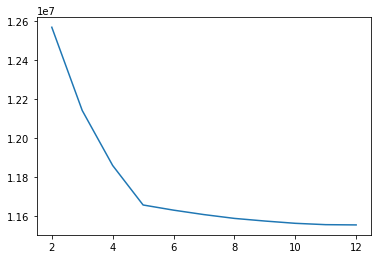

In [674]:
plt.plot(range(2,13),cost_dec)

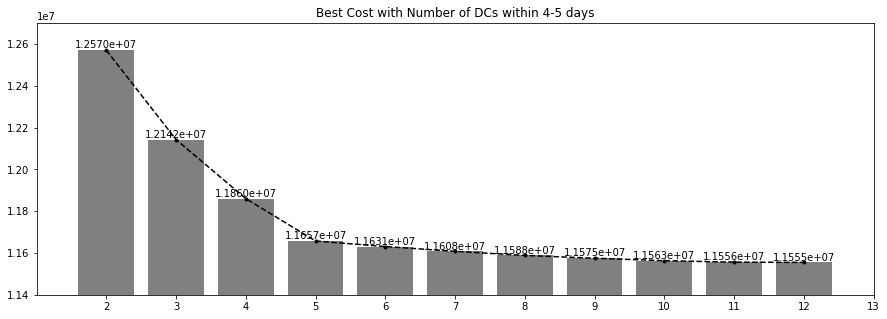

In [678]:
plt.figure(figsize=(15,5))
bars=plt.bar(range(2,13),cost_dec,color='grey')
plt.plot(range(2,13),cost_dec,color='black',linestyle='--',marker='.')
plt.ylim(11400000,12700000)
plt.xlim(1,12)
plt.xticks(np.linspace(2,13,12))  

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x()+(bar.get_width() / 2), h,'%.4e' % (h) , ha='center', va='bottom',color='black')

plt.title('Best Cost with Number of DCs within 4-5 days') 
plt.show()

In [545]:
dc12

['Denver',
 'Pittsburgh',
 'Indianapolis',
 'Dallas',
 'Greenville',
 'Charleston',
 'Chicago',
 'Memphis',
 'Atlanta',
 'Charlotte',
 'Nashville',
 'Knoxville']

# infer Customer zone positions

In [106]:
yellow = list(time.Denver[time.Denver==1].index)

In [107]:
orange = list(time.Denver[time.Denver==2].index)

In [108]:
green = list(time.Denver[time.Denver==3].index)

In [109]:
red = list(time.Denver[time.Denver==4].index)

In [110]:
light_orange = list(time.Denver[time.Denver==5].index)

In [111]:
den_distribution = [len(yellow),len(orange),len(green),len(red),len(light_orange)]

In [112]:
charston_5 = list(time.Charleston[time.Charleston==5].index)

In [113]:
charston_5

[816, 840, 890, 935]

In [114]:
WA_OR_CA = list(set(charston_5).intersection(set(green)))

In [115]:
CO_WY = yellow.copy()

In [116]:
charston_4 = list(time.Charleston[time.Charleston==4].index)

In [117]:
ND = list(set(charston_4).intersection(set(green)))

In [118]:
ND

[900,
 902,
 904,
 905,
 906,
 913,
 914,
 917,
 919,
 920,
 921,
 922,
 923,
 925,
 926,
 928,
 930,
 932,
 933,
 934,
 937,
 939,
 940,
 941,
 943,
 945,
 946,
 947,
 949,
 950,
 951,
 953,
 954,
 956,
 958,
 959,
 960,
 838,
 971,
 972,
 973,
 974,
 975,
 852,
 853,
 980,
 983,
 856,
 857,
 981,
 859,
 860,
 982,
 864,
 992,
 874,
 875,
 891]

In [119]:
SD_NE_NM_AZ = list(set(charston_4).intersection(set(orange)))

In [120]:
SD_NE_NM_AZ

[832, 833, 834, 836, 837, 841, 844, 590, 846, 594, 596, 597, 598, 824]

In [121]:
NV_ID_UT_MT_WY =list(set(charston_5).intersection(set(orange)))

In [122]:
NV_ID_UT_MT_WY

[]

In [123]:
 SD_NE_NM_AZ,,NV_ID_UT_MT_WY,

SyntaxError: invalid syntax (<ipython-input-123-3064e72ff503>, line 1)

In [124]:
WA_OR_CA

[816, 840]

In [125]:
pittsburg_4 = list(time.Pittsburgh[time.Pittsburgh==4].index)

In [126]:
pittsburg_5 = list(time.Pittsburgh[time.Pittsburgh==5].index)

In [127]:
pittsburg_5

[816, 840, 890, 935]

In [128]:
AZ_NM = list(set(pittsburg_5).intersection(SD_NE_NM_AZ))

In [129]:
AZ_NM

[]

In [130]:
SD_NE = SD_NE_NM_AZ.copy()

In [131]:
# pittsburg_5 intersect WA_OR_CA, got only OR has customer zones
OR = WA_OR_CA.copy()

In [162]:
IL_WI_MI.remove(503)

In [161]:
IA_MO

[641, 662, 503]

In [187]:
SD_NE

[832, 833, 834, 836, 837, 841, 844, 590, 846, 594, 596, 597, 598, 824]

In [209]:
customer_zone = [OR,ND,CO_WY,SD_NE,TXmost_OK,IA_MO,IL_WI_MI,other_EAST]

In [210]:
c_zone = DataFrame(np.zeros((505,8)),index=list(dc_c_cost.index),columns=['OR','ND','CO_WY','SD_NE','TXmost_OK','IA_MO','IL_WI_MI','OtherEast'])

In [191]:
customer_zone[0]

[816, 840]

In [193]:
c_zone= np.zeros((505,8))

In [194]:
c_zone[OR,0]=1

IndexError: index 816 is out of bounds for axis 0 with size 505

In [211]:
names = ['OR','ND','CO_WY','SD_NE','TXmost_OK','IA_MO','IL_WI_MI','OtherEast']
for i in range(len(names)):
    c_zone.loc[customer_zone[i],names[i]]=1

In [212]:
writeExcelData(c_zone, excelfile, sheetname="zone_distribution", startrow=3,startcol=2)

In [203]:
all_west = []
for m in customer_zone:
    for n in m:
        all_west.append(n)

In [204]:
len(all_west)

154

In [205]:
all_zones = list(dc_c_cost.index)

In [206]:
len(all_zones)

505

In [207]:
other_EAST = list(set(all_zones).difference(set(all_west)))

In [208]:
len(other_EAST)

351

In [198]:
c_zone.loc[816,]

OR           1.0
ND           0.0
CO_WY        0.0
SD_NE        0.0
TXmost_OK    0.0
IA_MO        0.0
IL_WI_MI     0.0
OtherEast    0.0
Name: 816, dtype: float64

In [ ]:
for i in customer_zone:
    for j in i:
        

In [182]:
cz={}
for i in range(len(customer_zone)):
    for j in range(i+1,len(customer_zone)):
        intersection = list(set(customer_zone[i]).intersection(customer_zone[j]))
        cz[str(customer_zone[i])+str(customer_zone[j])]=intersection
        if len(intersection)>0:
            print(str(customer_zone[i])+str(customer_zone[j]))
        

In [183]:
cz

{'[816, 840][900, 902, 904, 905, 906, 913, 914, 917, 919, 920, 921, 922, 923, 925, 926, 928, 930, 932, 933, 934, 937, 939, 940, 941, 943, 945, 946, 947, 949, 950, 951, 953, 954, 956, 958, 959, 960, 838, 971, 972, 973, 974, 975, 852, 853, 980, 983, 856, 857, 981, 859, 860, 982, 864, 992, 874, 875, 891]': [],
 '[816, 840][800, 801, 802, 806, 809, 810, 815]': [],
 '[816, 840][832, 833, 834, 836, 837, 841, 844, 590, 846, 594, 596, 597, 598, 824]': [],
 '[816, 840][648, 672, 673, 711, 730, 731, 734, 735, 736, 740, 741, 748, 750, 751, 752, 754, 756, 757, 759, 760, 761, 762, 763, 765, 770, 782, 787, 796]': [],
 '[816, 840][641, 662, 503]': [],
 '[816, 840][631, 524, 527, 530, 531, 532, 535, 537, 541, 543, 546, 549, 463, 466, 600, 601, 603, 604, 605, 478, 479, 480, 606, 610, 611, 484, 612, 613, 614, 488, 489, 490, 616, 492, 617, 494, 495, 620, 622, 624, 628, 629]': [],
 '[900, 902, 904, 905, 906, 913, 914, 917, 919, 920, 921, 922, 923, 925, 926, 928, 930, 932, 933, 934, 937, 939, 940, 941, 943

In [184]:
length = 0
for l in customer_zone:
    length+= len(l)

In [185]:
length

154

In [154]:
PA_OH_WV = pittsburg_1.copy()

In [155]:
len(PA_OH_WV)

78

In [156]:
len(ND)

58

In [625]:
length

155

In [134]:
pittsburg_2 = list(time.Pittsburgh[time.Pittsburgh==2].index)

In [135]:
IA_MO_TXpart =  list(set(pittsburg_2).intersection(orange))

In [136]:
IA_MO_TXpart

[641, 750, 751, 752, 662, 503, 760, 761, 762, 763, 796, 735]

In [137]:
dallas_1 = list(time.Dallas[time.Dallas==1].index)

In [138]:
TXmost_OK = dallas_1.copy()

In [139]:
TXpart = list(set(dallas_1).intersection(IA_MO_TXpart))

In [140]:
# list(set(b).difference(set(a))) # b中有而a中没有的

In [141]:
IA_MO = list(set(IA_MO_TXpart).difference(set(TXpart)))

In [142]:
ND

[900,
 902,
 904,
 905,
 906,
 913,
 914,
 917,
 919,
 920,
 921,
 922,
 923,
 925,
 926,
 928,
 930,
 932,
 933,
 934,
 937,
 939,
 940,
 941,
 943,
 945,
 946,
 947,
 949,
 950,
 951,
 953,
 954,
 956,
 958,
 959,
 960,
 838,
 971,
 972,
 973,
 974,
 975,
 852,
 853,
 980,
 983,
 856,
 857,
 981,
 859,
 860,
 982,
 864,
 992,
 874,
 875,
 891]

In [143]:
chicago_1= list(time.Chicago[time.Chicago==1].index)

In [144]:
IL_WI_MI = list(set(chicago_1).intersection(pittsburg_2))

In [145]:
IL_WI_MI

[631,
 524,
 527,
 530,
 531,
 532,
 535,
 537,
 541,
 543,
 546,
 549,
 463,
 466,
 600,
 601,
 603,
 604,
 605,
 478,
 479,
 480,
 606,
 610,
 611,
 484,
 612,
 613,
 614,
 488,
 489,
 490,
 616,
 492,
 617,
 494,
 495,
 620,
 622,
 624,
 628,
 629,
 503]

In [146]:
IA_MO

[641, 662, 503]

In [147]:
red

[10,
 12,
 14,
 18,
 19,
 21,
 22,
 24,
 27,
 28,
 30,
 31,
 38,
 40,
 42,
 49,
 52,
 57,
 60,
 61,
 63,
 64,
 65,
 67,
 68,
 70,
 71,
 76,
 77,
 78,
 79,
 86,
 88,
 100,
 104,
 105,
 107,
 109,
 110,
 112,
 113,
 115,
 117,
 120,
 121,
 122,
 123,
 125,
 127,
 128,
 130,
 132,
 133,
 135,
 136,
 148,
 149,
 224,
 231,
 232,
 233,
 234,
 235,
 236,
 238,
 240,
 241,
 243,
 245,
 246,
 271,
 272,
 275,
 276,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 287,
 291,
 292,
 294,
 295,
 296,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 309,
 310,
 312,
 315,
 317,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 329,
 330,
 331,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 342,
 344,
 346,
 347,
 349,
 350,
 352,
 359,
 360,
 361,
 362,
 363,
 364,
 366,
 367,
 368,
 785,
 799,
 880,
 890,
 935]

In [148]:
light_orange

[]

In [165]:
pittsburg_1 = list(time.Pittsburgh[time.Pittsburgh==1].index)

In [166]:
pittsburg_1

[80,
 82,
 140,
 142,
 150,
 151,
 152,
 153,
 158,
 161,
 162,
 163,
 165,
 166,
 170,
 171,
 174,
 176,
 177,
 180,
 185,
 190,
 191,
 193,
 194,
 196,
 199,
 200,
 201,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 216,
 217,
 218,
 253,
 257,
 260,
 261,
 265,
 403,
 405,
 410,
 430,
 431,
 432,
 433,
 435,
 439,
 440,
 441,
 442,
 443,
 445,
 446,
 447,
 448,
 450,
 451,
 452,
 453,
 454,
 456,
 457,
 458,
 460,
 461,
 462,
 467,
 468,
 469,
 481,
 482,
 483]

In [167]:
charston_1 = list(time.Charleston[time.Charleston==1].index)

In [152]:
charston_1

[150,
 151,
 152,
 153,
 161,
 247,
 253,
 257,
 258,
 260,
 261,
 265,
 402,
 403,
 405,
 410,
 430,
 431,
 432,
 433,
 435,
 439,
 441,
 442,
 443,
 445,
 446,
 447,
 448,
 450,
 451,
 452,
 453,
 454,
 456,
 457,
 458,
 460,
 461,
 462,
 467,
 468,
 469,
 472]

In [153]:
SC_GApart = charston_1.copy()

In [168]:
list(set(charston_1).intersection(pittsburg_1))

[257,
 260,
 261,
 265,
 403,
 405,
 150,
 151,
 152,
 153,
 410,
 161,
 430,
 431,
 432,
 433,
 435,
 439,
 441,
 442,
 443,
 445,
 446,
 447,
 448,
 450,
 451,
 452,
 453,
 454,
 456,
 457,
 458,
 460,
 461,
 462,
 467,
 468,
 469,
 253]

In [169]:
atlanta1 = list(time.Atlanta[time.Atlanta==1].index)

In [170]:
list(set(atlanta1).intersection(pittsburg_1))

[]

In [171]:
list(set(atlanta1).intersection(charston_1))

[]

In [172]:
atlanta1

[282,
 292,
 296,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 309,
 310,
 312,
 315,
 317,
 319,
 322,
 323,
 324,
 325,
 350,
 352,
 356,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 366,
 367,
 368,
 372,
 374,
 379,
 397]

In [173]:
greenville_1 = list(time.Greenville[time.Greenville==1].index)

In [178]:
charston_1

[150,
 151,
 152,
 153,
 161,
 247,
 253,
 257,
 258,
 260,
 261,
 265,
 402,
 403,
 405,
 410,
 430,
 431,
 432,
 433,
 435,
 439,
 441,
 442,
 443,
 445,
 446,
 447,
 448,
 450,
 451,
 452,
 453,
 454,
 456,
 457,
 458,
 460,
 461,
 462,
 467,
 468,
 469,
 472]

In [175]:
list(set(greenville_1).intersection(charston_1))

[258, 403, 405, 247]

In [176]:
list(set(greenville_1).intersection(pittsburg_1))

[403, 405]

In [177]:
list(set(greenville_1).intersection(atlanta1))

[282,
 292,
 296,
 300,
 301,
 302,
 303,
 305,
 306,
 307,
 309,
 310,
 312,
 319,
 352,
 359,
 361,
 362,
 368,
 372,
 374,
 379]

In [ ]:
#distribution of DCs

In [ ]:
# W1

In [202]:
dc_c_opt_use = dc_c_opt.copy()

In [203]:
dc_c_opt_use[ dc_c_opt_use>0] =1

In [205]:
dc_c_w5_time = dc_c_opt_use * time

In [206]:
writeExcelData(dc_c_w5_time, excelfile, sheetname="w5_time", startrow=3,startcol=2)

In [223]:
freq = dc_c_w5_time.sum(axis=0)

In [224]:
volume = dc_c_opt.sum(axis=0)

In [305]:
dc_names = dc_c_opt.columns.tolist()

In [306]:
dc_names

['Atlanta',
 'Charleston',
 'Charlotte',
 'Chattanooga',
 'Chicago',
 'Cincinnati',
 'Dallas',
 'Denver',
 'Greenville',
 'Indianapolis',
 'Knoxville',
 'Louisville',
 'Memphis',
 'Nashville',
 'Pittsburgh']

In [241]:
freq.index

Index(['Atlanta', 'Charleston', 'Charlotte', 'Chattanooga', 'Chicago',
       'Cincinnati', 'Dallas', 'Denver', 'Greenville', 'Indianapolis',
       'Knoxville', 'Louisville', 'Memphis', 'Nashville', 'Pittsburgh'],
      dtype='object')

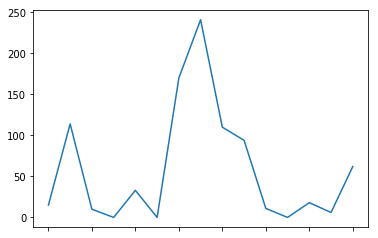

In [242]:
freq.plot(label='index')


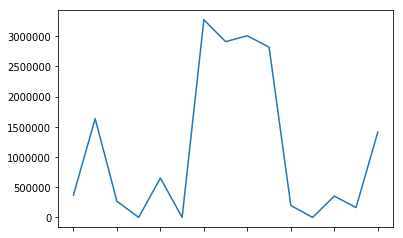

In [235]:
volume.plot()

In [244]:
ratio = volume/freq

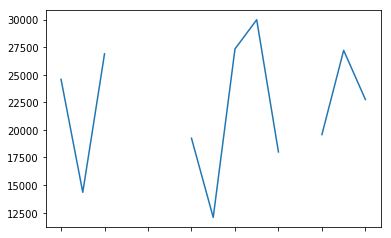

In [246]:
ratio.plot()